<a href="https://colab.research.google.com/github/UN-GCPDS/curso_IA_CHEC/blob/main/Modulo5/cuadernos/Modulo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Logo UNAL CHEC](https://github.com/UN-GCPDS/curso_IA_CHEC/blob/main/logo_unal_chec.jpg?raw=1)

# **MÓDULO 5: SERIES DE TIEMPO**

## **Descripción**

En este módulo, se estudiarán los principios de análisis de series de tiempo, incluyendo los modelos autorregresivos, modelos de Markov y modelos de aprendizaje profundo utilizando redes recurrentes para tareas de predicción y proceso de secuencias.



### **Profesor - Sesión 9:** German Castellanos-Dominguez
### **Monitores - Sesión 9:** Danna Valentina Salazar Dubois y Juan Camilo Lugo Rojas

#**Procesos Estacionarios**

**Modelo estocástico de variabilidad en el tiempo**

Una señal aleatoria (*proceso*) es una variable aleatoria, $\xi(t, s, \dots)$, que se extiende en uno o varios dominios, $t, s,$.

Dado que el tiempo, $t$, es el dominio más comúnmente considerado, en adelante los procesos aleatorios estrán solo referidos a él.

$x_m(t)$ es una *trayectoria* única (temporal), mientras que un *conjunto* o *ensamble* es el grupo de $$\{x_m(t) \in \xi : \forall t \in T, m \in M\}$$

En el sentido estricto, un proceso aleatorio se denomina **no estacionario** si:

$$ p(\xi, t) = \text{var}, \quad t \in \mathbb{R}$$

es decir, el modelo de aleatoriedad, *descrito por su función de probabilidad*, es variante sobre el dominio del tiempo.

Por el contrario, un proceso aleatorio se denomina **estacionario** si:

$$p(x_m, t) = p(x_m, t + \Delta t), \quad \forall \Delta t$$
es decir, el modelo de aleatoriedad, en términos de su función de probabilidad, permanece constante en el tiempo.

En la práctica, no siempre se tiene acceso o no es conocible la función densidad de probabilidad, con lo cual la estacionaridad en sentido estricto es una suposición difícil de contemplar.

Una suposición relajada sobre los ensambles es el modelo de estacionariedad por intervalos:

$$p(x_n, t) = p(x_n, t + \Delta t), \quad \forall t \in \mathbb{R}, \quad \forall n \in N$$

**Ergodicidad** (Estacionariedad en Sentido Amplio - Wide-sense Stationarity): Se asume la invariabilidad en el tiempo de los momentos estadísticos mediante la siguiente equivalencia:

$$\text{momentos promediados sobre ensamble} = \text{momentos promediados sobre tiempo}$$

1. **Momentos iniciales**:
    $$\int_{-\infty}^{\infty} x^n p(x) \, dx \approx \lim_{T \to \infty} \frac{1}{T} \int_0^T x^n(t) \, dt = \overline{x^n}(t), \quad n \in \mathbb{N}$$

2. **Momentos centralizados**:
    $$    \int_{-\infty}^{\infty} (x - m_{1x})^n p(x) \, dx \approx \lim_{T \to \infty} \frac{1}{T} \int_0^T (x(t) - x(t))^n \, dt, \quad n \geq 2, \, n \in \mathbb{N}$$

3. **Función de (auto)correlación**:
    $$ \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} x y p(x, y) \, dx dy \approx \lim_{T \to \infty} \frac{1}{T} \int_0^T x(t) y^*(t + \tau) \, dt = R_{xy}(\tau)$$

Sobre la Estacionariedad en Sentido Amplio se definen *los procesos estocásticos de segundo orden*:

$$\{m_{1x}(t) = m_{1x}; \quad \sigma_x(t) = \sigma_x, \quad \forall t; \quad R_{xy}(t, t + \tau) = R_{xy}(\tau)\}$$


## **Función de Correlación [Lineal]**

$$R_x(\tau) = \lim_{T \to \infty} \frac{1}{T} \int_T x(t) x^*(t + \tau) \, dt,
$$

$T\,$ intervalo de análisis, que se toma suficientemente amplio.

**Propiedades**
    
(a) **Paridad:** $R_x(\tau) = R_x^*(-\tau)$

(b) **Valor máximo:** $max_{\forall \tau} |R_x(\tau)| \leq R_x(0) \quad = \frac{1}{T} \int_T x(t) x^*(t) \, dt = \overline{x^2(t)}$$

Nota:
$\sigma^2_x = \overline{x^2(t)}- \overline{x^n}(t)^2$

(c) **Periodicidad:** Si $x(t) = x(t - T), \forall t \in T$, entonces $\quad R_x(\tau) = R_x(\tau - T), \forall \tau \in T.$
    
(d) **Convergencia:** Siempre que se cumpla que $x(t) \neq x(t - T), \forall t \in T$ entonces
   
$$\lim_{|\tau| \to \infty} R_x(\tau) = x^2(t), \quad \lim_{|\tau| \to \infty} K_x(\tau) = 0$$
    
(e) **Restricción de forma:** La Transformada de Fourier, $\mathcal{F}$, debe cumplir la condición positiva semidefinida:

$$\mathcal{F}\{R_x(\tau)\} \geq 0, \quad \forall \omega$$

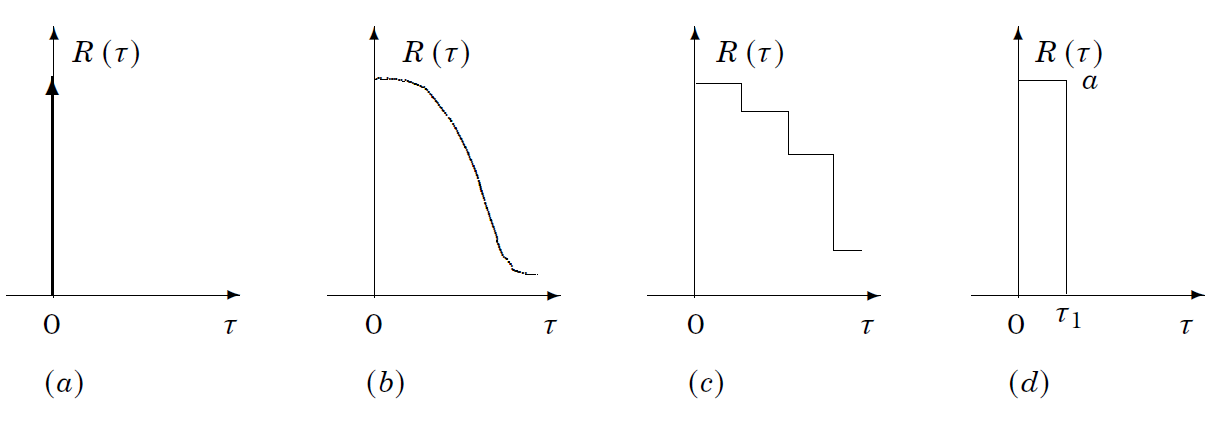


En los procesos*ergódicos de segundo orden*, si el valor esperado es cero,
$$R_x(0)= \overline{x^2(t)} = \sigma^2_x $$
entonces, **solamente con la función de correlación es suficiente su descripción**!!!!

### **Densidad Espectral de Potencia - PSD**

Transformada de Wiener-Jinchin,
$$
S_x(\omega) = \mathcal{F} \{ R_x(\tau) \}  
$$
De manera similar,
$$
\mathcal{F}^{-1} \{ S_{\xi}(\omega) \} = \mathcal{F}^{-1} \left\{ \mathcal{F} \{ R_{\xi}(\tau) \} \right\} = R_{\xi}(\tau)
$$
donde $\mathcal{F}$ denota la Transformada de Fourier.

**Ruido Blanco Gaussiano (WGN).** Un proceso ergódico $\eta(t)$, $\forall t \in T$, que contiene todos los componentes espectrales (por eso se dice *blanco*); cada uno con la misma potencia promedio:

-  $S_{\eta}(\omega) = N_0/2$, donde $\omega \in (-\infty, \infty),\qquad\textrm{Densidad Espectral de Potencia constante}$.

- Mediante Wiener-Jinchin, se obtiene la siguiente función de correlación:
  $$
  R_{\eta}(\tau) = \int_{-\infty}^{\infty} \frac{N_0}{2} e^{j 2 \pi f \tau} \, df = \frac{N_0}{2} \delta(\tau)
  $$
En otras palabras, los valores $\eta(t)$ y $\eta(t+\tau)$ son independientes para $\tau \neq 0$. Esta condición se cumple, solo y estricatemente, si $\eta(t)$ está distribuido normalmente para cada $\tau$, por eso se dice *Gaussiano*.
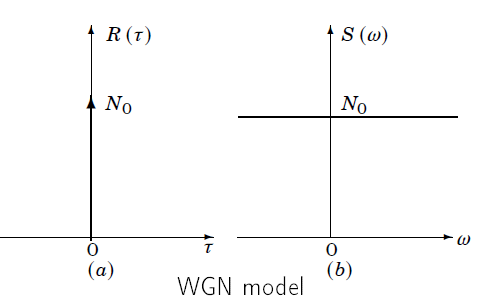

1. **(a)** $R(\tau)$ representado con una función delta de altura $N_0/2$.
2. **(b)** $S(\omega)$ igualmente constante a $N_0/2$ en toda frecuencia $\omega$.


In [ ]:
!git clone https://github.com/UN-GCPDS/curso_IA_CHEC.git

In [ ]:
# @title Set-Up
!pip install pmdarima hmmlearn statsmodels
!pip install -U sympy

import os
import numpy as np                  #  fundamental numerical computing tools
import pandas as pd                 # library for working with data structures

import torch
import torch.nn as nn

from scipy.signal import butter, lfilter, freqz
import scipy as sp
from scipy.stats import gaussian_kde

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans

from tensorflow.keras.layers import Dense, Input, LSTM, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import Sequential, load_model

from hmmlearn import hmm

import statsmodels
import statsmodels.api as sm

import seaborn as sns               # higher-level interface for creating statistical graphics
sns.set_theme(context="paper", palette="husl", style = 'whitegrid' ,font_scale=1.2, color_codes=True)
from termcolor import colored
import warnings
import pickle

import matplotlib.pyplot as plt     #  the core plotting library
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.statespace.sarimax import SARIMAX

from IPython.display import HTML
from matplotlib.animation import FuncAnimation

from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

from matplotlib.patches import Rectangle
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

from matplotlib import rcParams

# Set up plotting style
plt.rcParams['figure.figsize']   = (18, 9)
plt.rcParams['lines.markersize'] = 9
plt.rcParams['axes.labelsize']   = 15
plt.rcParams['axes.titlesize']   = 15
plt.rcParams['xtick.labelsize']  = 12
plt.rcParams['ytick.labelsize']  = 12
plt.rcParams['legend.fontsize']  = 12
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['figure.dpi']       = 180

# Suppress warnings
warnings.filterwarnings("ignore")

# Define color and alpha levels
alfas = [0.57, 0.72, 0.84, 0.96, 1.0]

kolor = [
    "#4E8A34",  # Grass - Darker
    "#C06025",  # Fire - Darker
    "#4267C0",  # Water - Darker
    "#7B8914",  # Bug - Darker
    "#737362",  # Normal - Darker
    "#762976",  # Poison - Darker
    "#C8A020",  # Electric - Darker
    "#B89850",  # Ground - Darker
    "#D17C89",  # Fairy - Darker
    "#8C2020",  # Fighting - Darker
    "#C04A6A",  # Psychic - Darker
    "#8F741F",  # Rock - Darker
    "#564279",  # Ghost - Darker
    "#6AB0B0",  # Ice - Darker
    "#4E22B8",  # Dragon - Darker
]


#   Augmented Dickey-Fuller (ADF)
def Stationarity(data, α = 0.05):
    """Performs the Augmented Dickey-Fuller (ADF) test for stationarity.

    Args:
        data: The time series data to test.
        α   : The significance level for the test.

    Returns:
        None
    """
    # Run the test
    print(f"Performing Dickey-Fuller and Augmented Dickey-Fuller tests for stationarity...")
    dftest = adfuller(data, autolag = 'AIC')
    print(f"1. ADF Statistic: {dftest[0]}")
    print(f"2. p-Value :  {dftest[1]}")
    # Check the value of p-value
    # if p-value is less than α, the time series data holds stationarity
    if dftest[1] > α:
        print('data is non-stationary')
    else:
        print('data is  stationary')

def KernelDE(data,Nbins, bandwidth=None):
    """Calculates kernel density estimation for the given data.

    Args:
        data: The input data.
        Nbins: The number of bins for the density estimate.
        bandwidth: The bandwidth of the kernel. If None, the optimal bandwidth is estimated.

    Returns:
        A tuple of (x_vals, kde_vals), where:
            - x_vals: The x-values of the density estimate.
            - kde_vals: The corresponding density values.
    """
    if len(data) == 0:
        raise ValueError("Input data cannot be empty.")

    if Nbins <= 0:
        raise ValueError("Nbins must be a positive integer.")

    kde = gaussian_kde(data, bw_method=bandwidth)
    x_vals = np.linspace(min(data), max(data), Nbins)
    kde_vals = kde(x_vals)
    return kde_vals

# Piecewise Aggregate Approximation
def piecewise_aggregate_approximation(data, num_segments=None):
    """
    Performs Piecewise Aggregate Approximation (PAA) on a time series.

    Args:
        data: The input time series data as a NumPy array.
        num_segments: The desired number of segments. If None, the square root of the data length is used.

    Returns:
        The PAA-transformed time series.
    """

    time_series_len = len(data)

    # Determine the number of segments
    if num_segments is None:
        num_segments = int(np.sqrt(time_series_len))

    # Calculate segment length
    segment_len = time_series_len // num_segments

    # Pad the data if necessary to ensure equal segment lengths
    if time_series_len % num_segments != 0:
        padding_len = num_segments * segment_len - time_series_len
        data = np.pad(data, (0, padding_len), mode='constant')

    # Reshape the data into segments
    data_reshaped = data.reshape(num_segments, segment_len)

    # Calculate the mean of each segment
    paa_data = np.mean(data_reshaped, axis=1)

    return paa_data

# Hidden Markov Models
def HMM_paa(paa_data, N_comp=3, n_iter=50, random_state=42):
    """
    Train a Gaussian Hidden Markov Model on the PAA data.

    Parameters:
    - paa_data: List or 1D numpy array of PAA-transformed data.
    - N_comp: Number of hidden states (components) for the HMM. Default is 3.
    - n_iter: Number of iterations for model training. Default is 50.
    - random_state: Random seed for reproducibility. Default is 42.

    Returns:
    - model: Trained Gaussian HMM model.
    """
    # Reshape the data to 2D as expected by HMM
    paa_data = np.array(paa_data).reshape(-1, 1)

    # Initialize and train the Gaussian HMM
    model = hmm.GaussianHMM(n_components=N_comp, covariance_type="diag", n_iter=n_iter, random_state=random_state)
    model.fit(paa_data)

    return model

def one_period_forecast(model, forecasts, confidence_intervals):
    fcast = model.predict(n_periods=1, return_conf_int=True, alpha=0.05)
    # fcast is a list of two lists.
    # The first list is the forecast
    forecasts = fcast[0].tolist()
    # The second list is the confidence interval
    confidence_intervals = fcast[1]
    return ( forecasts,
             np.asarray(confidence_intervals).tolist()[0])

# Define function to create windowed dataset
def create_windowed_data(data, window_size, stride=1):
  """
  Creates windowed data for time series prediction.

  Args:
    data: The time series data as a NumPy array.
    window_size: The number of time steps in each window.
    stride: The number of time steps to slide the window.
    features: The number of features in the data.

  Returns:
    A tuple of NumPy arrays: (X, y), where:
      - X: The input data with shape (num_samples, window_size, features).
      - y: The target values with shape (num_samples, features).
  """
  X, y = [], []
  for i in range(0, len(data) - window_size, stride):
    X.append(data[i:i+window_size])
    y.append(data[i+window_size])

  X = np.array(X)
  y = np.array(y)

  return X, y

#  Plotting Procedure
def calculate_psd(signal, fs=1000):
    """
    Calculate Power Spectral Density (PSD) of a signal.

    Parameters:
    - signal: The input signal (time-domain).
    - fs: Sampling frequency.

    Returns:
    - frequencies: Array of frequencies.
    - psd: Power Spectral Density.
    """
    n = len(signal)
    frequencies = np.fft.fftfreq(n, 1/fs)
    fft_result = np.fft.fft(signal)
    psd = np.abs(fft_result)**2 / n
    return frequencies, psd

def tsplot(ys, labels, title_,  colors=kolor, alfa=alfas, flag=0, original=None):
    """
    ys:     Lista o array de series de tiempo
    labels: Lista de etiquetas para cada serie en ys
    title_: Título del gráfico
    colors: Lista de colores para cada serie
    alfa:   Lista de valores de transparencia (alpha) para cada serie
    flag:   Tipo de gráfico (0 = Time series, 1 = PSD, 2 = ACF/PACF, 3 = Todos)
    """
    if colors is None:
        colors = ['b'] * len(ys)
    if alfa is None:
        alfa = [1.0] * len(ys)
    if labels is None:
        labels = ['?'] * len(ys)

    style = 'tableau-colorblind10'
    nlag  = np.ceil(np.log2(len(ys[0])))
    with plt.style.context(style):
        layout = (3, 2) if flag == 3 else (1, 2)
        fig = plt.figure(figsize=(18, 9) if flag == 3 else (18, 6))
        fig.suptitle(title_)

        if flag in [0, 3]:  # Time series plot
            ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
            ts_ax.set_title('Time series')

        if flag in [1, 3]:  # PSD plot
            psd_ax = plt.subplot2grid(layout, (1, 0), colspan=2) if flag == 3 else plt.subplot2grid(layout, (0, 0), colspan=2)
            psd_ax.set_xscale('log')
            psd_ax.set_title('PSD')

        if flag in [2, 3]:  # ACF/PACF plots
            acf_ax = plt.subplot2grid(layout, (2, 0))  if flag == 3 else plt.subplot2grid(layout, (0, 0))
            pacf_ax = plt.subplot2grid(layout, (2, 1)) if flag == 3 else plt.subplot2grid(layout, (0, 1))

        for i, y in enumerate(ys):
            y = pd.Series(y).dropna()  # Asegurarse de que los datos son Series y sin NaN
            if original is not None:
                y2 = pd.Series(original[i]).dropna()
            color, alpha, label = colors[i], alfa[i], labels[i]
            if flag in [0, 3]:  # Time series plot
                ts_ax = y.plot(ax=ts_ax, c=color, alpha=alpha, label=label)
                if original is not None:
                    ts_ax = y2.plot(ax=ts_ax, c=color, linestyle='--', alpha=1)
                ts_ax.set_xlim(0, len(y))
            if flag in [1, 3]:  # PSD plot
                freq, psd = calculate_psd(y)
                psd_ax.plot(freq[freq >= 0], 10 * np.log10(psd[freq >= 0]), color=color, alpha=alpha, label=label)
                if original is not None:
                    freq2, psd2 = calculate_psd(y2)
                    psd_ax.plot(freq2[freq2 >= 0], 10 * np.log10(psd2[freq2 >= 0]), linestyle='--', color=color, alpha=1)
                psd_ax.set_xlim(0, np.max(freq))
            if flag in [2, 3]:  # ACF/PACF plots
                sm.graphics.tsa.plot_acf(y, lags=nlag, ax=acf_ax, alpha=alpha, color=color, label=label)
                sm.graphics.tsa.plot_pacf(y, lags=nlag, ax=pacf_ax, alpha=alpha, color=color, label=label)
        fig.axes[0].legend(ncol=3, loc='lower center', fontsize=12) # Poner leyenda a primer subfigura
        plt.tight_layout()
    plt.show()
    return

def load_npz_arrays(filename):
    # Write a code to read npz file
    # and return a list of arrays
    with np.load(filename) as data:
        array_lst = [data[key] for key in data.keys()]
    return array_lst

def linear_corr(c, c_):
    # correlation estimation
  cm = c - np.mean(c, axis=0, keepdims=True)
  c_m = c_ - np.mean(c_, axis=0, keepdims=True)
  return c.T @ c_m /  (np.sqrt(np.sum(cm**2, axis=0,
        keepdims=True)).T * np.sqrt(np.sum(c_m**2, axis=0, keepdims=True)))

# Simulate the behavior of an RC (Resistor-Capacitor) filter
def RC_Filter(n_samples,input_signal,τ,order):
    # Define RC filter parameters
    R1  = 1000  # ohms
    R2  = 2000  # ohms
    C1  = 0.001e-6  # farads
    C2  = 0.002e-6  # farads
    RC  = τ*R1* C1*1e06
    RC2 = τ*R2* C2*1e01  # farads

    # Simulate the RC filter output signal
    output_signal = np.zeros_like(input_signal)
    if order ==1:
        for i in range(1, len(input_signal)):
            output_signal[i] = (1 - 1 / RC) * output_signal[i-1] + (1 / RC) * input_signal[i]
    else:
        # Create the filter transfer function
        num = [1/(RC*RC2)]
        den = [1, (RC + τ*R2*C1 + RC2)/(τ*RC*RC2), 1/(RC*RC2)]
        sys = sp.signal.TransferFunction(num, den)
        _,output_signal,_ = sp.signal.lsim(sys,input_signal, np.linspace(0, 1, n_samples))

    # Normalize the output signal
    if max(output_signal) != 0:
        output_signal = output_signal / max(output_signal)
    else:
        print("Divide by zero error detected, output_signal = ", output_signal)

    return output_signal


MODELOS = '/content/curso_IA_CHEC/Modulo5/modelos/'

In [ ]:
# @title Ruido blanco gaussiano

n_samples = int(1024)
nlag      = int(n_samples/5)
# Función de trazado con slider para sigma
def plot_with_slider(σ):
    # Generar una muestra de ruido
    signal = σ * np.random.normal(size=n_samples)
    _ = tsplot([signal], [f'σ={σ:.1f}'], title_='White gaussian noise', flag=3)

# Crear el deslizador interactivo para sigma
sigma_slider = FloatSlider(value=1, min=0.1, max=5, step=0.1, description='σ')

# Ejecutar la función interactiva
_ = interact(plot_with_slider, σ=sigma_slider) # _ = ... para que no retorne docstring

Por cuanto el valor de potencia es la suma de todas las componentes espectrales, las cuales son infinitas para el ruido blanco gaussiano, entonces su potencia es infinita. O sea, **el proceso WGN no  es físicamente realizable**... es un modelo hipotético!

Por el contrario, toda señal físicamente realizable debe tener potencia finita, y, por lo tanto, tiene ancho de banda finito,  con lo cual, sus valores estás correlacionados en el tiempo.

In [ ]:
# @title Señal con ancho de banda finito

σ = 1.5
order = 3  # Filter order
signal = σ * np.random.normal(size=n_samples)  # Generate white noise
fs = 1000

def butter_lowpass_filter(data, cutoff_freq, sampling_freq, order=4):
    # Design the Butterworth low-pass filter
    nyquist = 0.5 * sampling_freq
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False, output='ba')

    # Apply the filter to the data
    filtered_data = lfilter(b, a, data)

    return filtered_data

# Interactive function for plotting
def update_plots(cutoff_frequency):
    filtered_signal = butter_lowpass_filter(signal, cutoff_frequency, fs, order)
    tsplot([signal, filtered_signal], ['Original', f'Filtered Signal [{cutoff_frequency}Hz]'], title_='', flag=3)

# Create the interactive slider for cutoff frequency
cutoff_slider = FloatSlider(value=270, min=10, max=499, step=10, description='Cutoff Frequency (Hz)')
_ = interact(update_plots, cutoff_frequency=cutoff_slider)

**Estimación**

La estimación de un parámetro, $\tilde{\theta} \in \mathbb{R}$, consiste en su cálculo aproximado mediante el ajuste de la muestra de observación con su valor verdadero ${\theta} {\in} \mathbb{R}$. La estimación incluye una suposición de cálculo mediante una regla condicional $g(\cdot)$ y equipada de un criterio sobre la calidad de la aproximación.

En otras palabras, $\tilde{\theta}$ es la  estimación optimizada en términos de  la calidad del ajuste $epsilon$ y que mide por la distancia $d(\cdot)$ entre $\theta$ y $\tilde{\theta}$.

- **Regla de Cálculo:**
  $$
  g(\{x_i\} \in X, \epsilon | \theta)
  $$

- **Función de Costo:**
  $$
  \text{s.t.} \quad \min \epsilon = d(\theta, \tilde{\theta})
  $$


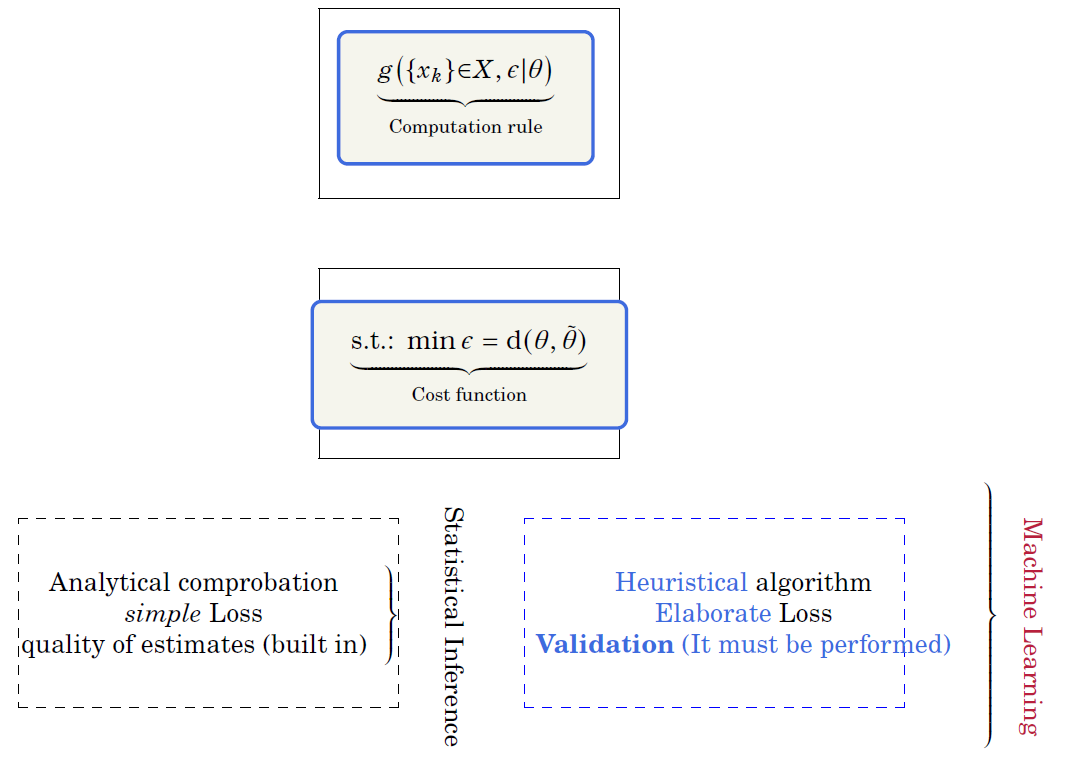


**Inferencia Estadística (Statistical Inference)**  
  - Comprobación Analítica (Analytical comprobation)
  - **Pérdida simple (simple Loss)**
  - Calidad de los estimados (quality of estimates) (integrado)

**Aprendizaje Automático (Machine Learning)**  
  - Algoritmo heurístico (Heuristic algorithm)
  - **Pérdida elaborada (Elaborate Loss)**
  - Validación (debe realizarse)


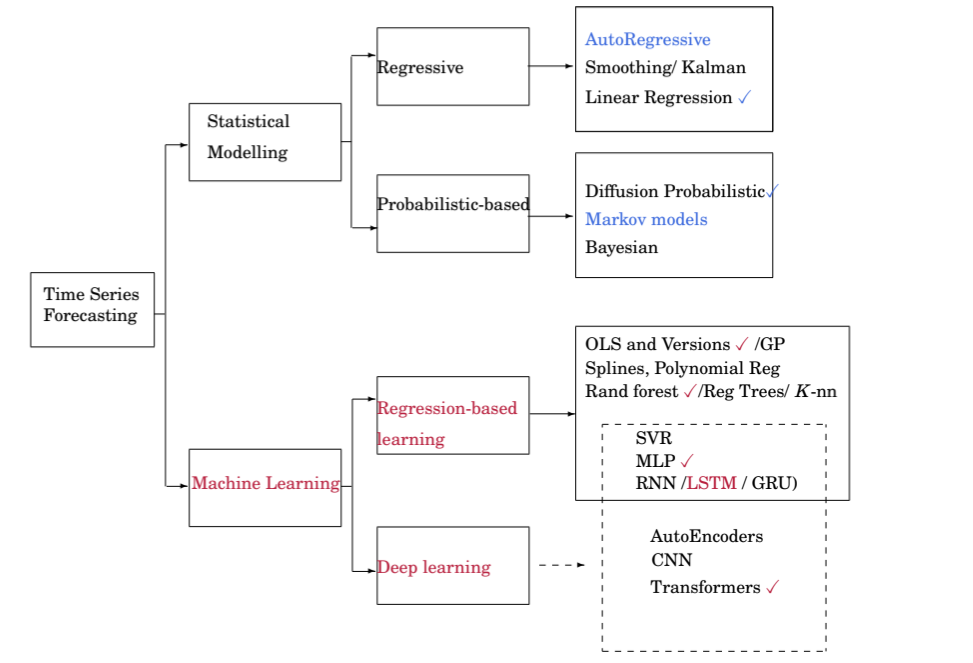

Diagrama sobre la taxonomía de las distintas técnicas de predicción de series temporales, divididas en tres grandes enfoques: modelado estadístico, aprendizaje automático y aprendizaje profundo, mostrando cómo cada técnica se especializa aplicaciones.

# **Modelos Autorregresivos**

**Suposición principal**: La estructura de aleatriedad de los procesos estacionarios de segundo orden se pueden relacionar con las respuestas de los sistemas lienales e invariantes en el tiempo.

Sean \( x \) e \( y \) la entrada y salida de un sistema lineal, $ y(t) = H(j\omega)x(t) $, entonces:

$$
H(j\omega) = \frac{\sum_{k \in n} \beta_k (j\omega)^k}{\sum_{k \in m} a_k (j\omega)^k}
$$

usando Wiener-Jinchin, se obtiene que:

$$
S_y(j\omega) = S_x(j\omega)|H(j\omega)|^2
$$

Por lo tanto, si se introduce ruido blanco  Gaussiano a un sistema lineal , $S_x(j\omega) = N_0 = const$, entonces, el espectro de salida tiene la misma forma de la magnitud de la función de transferencia del circuito:

$$
S_y(j\omega) \sim N_0 |H(j\omega)|^2
$$

$$
A(z) = 1 + \sum_{k=1}^{p} a_k z^{-k}, \quad B(z) = 1 + \sum_{k=1}^{q} b_k z^{-k}, \quad z^{-k} \text{ es el operador de retroceso}
$$

De lo anterior, **se puede generar Procesos Estocásticos mediante respuestas lineales retrasadas al ruido blanco Gaussiano.**

**Regresión** => moverse hacia atrás

## **Modelos Autoregresivos Lineales**

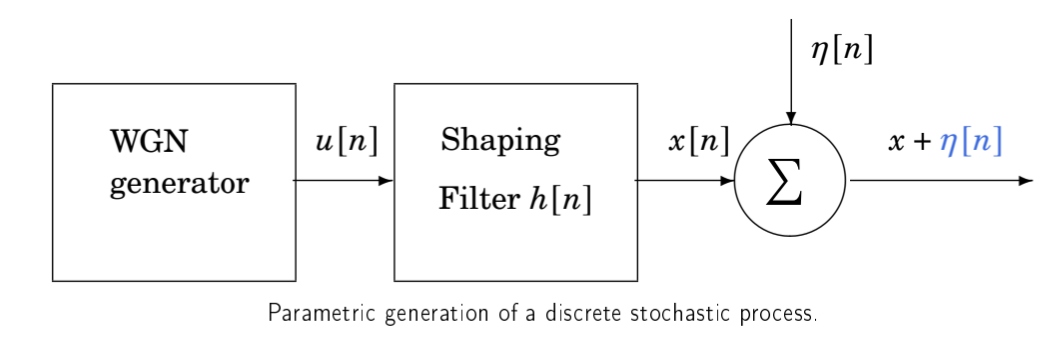

Un *modelo autorregresivo* codifica relaciones lineales entre muestras pasadas (retardadas) hasta  $ p $ y $ q $ instantes de tiempo (órdenes del modelo):

$$
x[n] = \sum_{k=1}^{p} a_k x[n - k] + \sum_{k=0}^{q} b_k u[n - k] + \eta[n], \quad a_k \in \mathbb{R}, \quad b_k \in \mathbb{R}
$$

donde la entrada \( u \) es una excitación no observable de ruido blanco gaussiano (WGN) con intensidad unitaria.

*Modelos autorregresivos* capturan patrones secuenciales modelando la relación lineal entre una observación y un número fijo de observaciones retardadas (períodos anteriores).

| Modelo      | Ecuación iterativa                                                                         |
|----------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------|
| AR[p]       | $ x[n] = -\sum_{k=1}^{p} a_k x[n - k] + u[n] $                                            |
| MA[q]       | $ x[n] = u[n] + \sum_{k=1}^{q} b_k u[n - k] $                                             |
| ARMA[p,q]   | $ x[n] = \sum_{k=1}^{p} a_k x[n - k] + u[n] + \sum_{k=1}^{q} b_k u[n - k] $               |
| ARIMA[p,d,q]| Modelo ARMA $ \rightarrow \frac{d^d x}{dt^d} $                                            |

$p $: El orden de la parte autorregresiva, $d $: El grado de diferenciación, $ q $: El orden de la parte de promedio móvil.



In [ ]:
# @title Respuestas de un circuito RC lineal al Ruido Blanco Gaussiano

np.random.seed(1)

## - [ ] Simulation of n-order RC Filters
τ = 10                       ### RC time constant   [1, 10, 100]
# Generate input signal (e.g., white noise)
n_samples = int(1024)
input_signal = np.random.normal(size=n_samples)
orders_rc = [1, 2]
signals = [input_signal] + [RC_Filter(n_samples, input_signal, τ, order) for order in orders_rc]
#Normalize the signals
output_signal = [(signal - np.min(signal)) / (np.max(signal) - np.min(signal)) if np.max(signal) != np.min(signal) else signal for signal in signals]

labels = ["zero-mean white noise"] + [f"{order}-order RC" for order in orders_rc]
title_= 'Stochastic responses from  n-order RC Filters'
tsplot(output_signal, labels, title_, colors= kolor,flag=3)

* La Densidad Espectral de Potencia (PSD) del proceso generado a partir de Ruido Blanco Gaussiano (WGN) se asemeja a la magnitud de la función de transferencia del circuito RC.

* Cuanto mayor es el orden del filtro RC, mayor es la inercia del filtro, y, por lo tanto, más suaves son las dinámicas de los procesos generados.

* Cuanto más suaves son las dinámicas, más amplia es el ancho de banda de la densidad espectral de potencia, pero también más amplia es la función de correlación.

In [ ]:
# @title Estimación del mejor modelo AR de orden *p*

# Define orders for AR models
nlag = np.ceil(np.log2(n_samples))
orders = range(1, int(nlag)+1) # Adjust the range as needed

# Create a subplot with 3 rows, one for each signal
fig, axes = plt.subplots(len(output_signal), 1, figsize=(9, 6), sharex=True)
best_order = {}
best_AR_params = {}

# Iterate over each signal in the list
for i, (signal_, label) in enumerate(zip(output_signal, labels)):
    aic_values = []
    bic_values = []

    # Fit AR models with different orders for each signal
    for p in orders:
        model = sm.tsa.ARIMA(signal_, order=(p, 0, 0)).fit()
        aic_values.append(model.aic)
        bic_values.append(model.bic)

    # Plot AIC and BIC values for the current signal in the subplot
    axes[i].plot(orders, aic_values,c= kolor[i], label='AIC',linestyle='--',)
    axes[i].plot(orders, bic_values, c= kolor[i], label='BIC')
    axes[i].set_title(f'AIC and BIC for {label}',fontsize=9)
    axes[i].set_xlim(min(orders), max(orders))
    axes[i].set_ylabel('Information Criterion',fontsize=9)
    axes[i].legend()
    # Choose the order with the lowest AIC or BIC
    best_order[labels[i]] = {'Best AIC AR order' : orders[np.argmin(aic_values)], 'Best BIC AR order' : orders[np.argmin(bic_values)]}

    # Fit the final AR model with the best order
    bestAR_model = sm.tsa.ARIMA(signal_, order=(orders[np.argmin(aic_values)], 0, 0)).fit()
    best_AR_params[labels[i]] = bestAR_model.params[:orders[np.argmin(aic_values)+1]]

# Set common labels
axes[-1].set_xlabel('AR Order Opt Estimation')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
print(pd.DataFrame(best_order))
max_len = max(len(arr) for arr in best_AR_params.values())
for key, arr in best_AR_params.items():
    padded_array = np.pad(arr, (0, max_len - len(arr)), constant_values=None)
    best_AR_params[key] = padded_array
index_names = [f"α{i} estimate" for i in range(max_len)]
print(pd.DataFrame(best_AR_params, index=index_names))

El método de ajuste no converge para el Ruido Blanco Gaussiano (WGN), lo que significa que no hay correlación lineal entre puntos vecinos.

Cuanto más cercanas están las dinámicas al WGN, peor es la estimación de parámetros.

Cuanto más suaves son las dinámicas, mayor es la estimación de *p*.

Cuanto más se asemeja el proceso a WGN, menor es la medida de información.

Ambos criterios de información (AIC y BIC) se comportan de manera similar en dinámicas simples.

In [ ]:
# @title Simulación del proceso AR(q)

ar_outputs = [output_signal[2]]
for i in range(4):
    ar_model = sm.tsa.ARIMA(output_signal[2], order=(i+1, 0, 0)).fit()
    α_coeffs = ar_model.params[1:i+2]
    ar_signal = np.zeros_like(output_signal[2])
    # Perform the reconstruction from the AR(4) model
    for t in range(4, len(signals[2])):
        ar_signal[t] = sum([α_coeffs[j] * output_signal[2][t - j - 1] for j in range(i+1)])
    ar_outputs.append(ar_signal)

_ = tsplot(ar_outputs, ['Original', 'AR(1)', 'AR(2)', 'AR(3)', 'AR(4)'], "AR Models", colors=kolor,  flag=0)

In [ ]:
# @title Simulación de procesos MA(q)

key = 0
if key != 0:
    q = []
    # Fit MA models with different orders
    for signal_ in output_signal:
        best_aic = float('inf')
        best_order = None
        if key != 0:
            for i in range(1, 13):  # Adjust the maximum order as needed
                model = ARIMA(signal_, order=(0, 0, i)).fit()
                aic = model.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = i
            q.append(best_order)
            print(f"Best MA order: {best_order}")

        else:
            q = [1,11,46]

        # Fitting of the MA model for the output signal
        ma_outputs = []
    for index, signal_ in enumerate(output_signal):

        MAmodel = sm.tsa.ARIMA(signal_, order=(0, 0, q[index]), trend='n', enforce_invertibility=False).fit()   # The order needed to be corrected as order=(0, 0, q)

        alphas = np.array([0.])             # set the MA(q) alphas equal to 0
        betas  = MAmodel.params[:-1]        # the betas should be assigned as the parameters of the fitted MA model

        # add zero-lag and negate alphas
        ar = np.r_[1, -alphas]   # Alphas should be negated
        ma = np.r_[1, betas]

        # Generate samples using the ArmaProcess class
        ma_process = ArmaProcess(ar, ma)
        ma_output = ma_process.generate_sample(nsample=n_samples)

        # Normalize the signal
        ma_outputs.append(ma_output/max(ma_output))
    np.savez_compressed('/content/curso_IA_CHEC/Modulo5/modelos/ma_outputs_.npz', **{"array"+str(i): array for i, array in enumerate(ma_outputs)})
ma_outputs = load_npz_arrays('/content/curso_IA_CHEC/Modulo5/modelos/ma_outputs_.npz')
ma_outputs = [(signal - np.min(signal)) / (np.max(signal) - np.min(signal)) if np.max(signal) != np.min(signal) else signal for signal in ma_outputs]
for index, signal_ in enumerate(output_signal):
    print(f'{labels[index]} | ρ = {linear_corr(ma_outputs[index], output_signal[index])} ')

_ = tsplot(ma_outputs,  labels, 'MA models', colors= kolor,flag=1, original=output_signal)

## Modelos ARIMA

### Estructura de Modelos ARIMA
1. **ARIMA(1,0,0):** $ y_t = \mu + \beta_1 y_{t-1} $
2. **ARIMA(2,0,0):** $ y_t = \mu + \beta_1 y_{t-1} + \beta_2 y_{t-2} $
3. **ARIMA(0,1,0):** $ y_t - y_{t-1} = \mu $ o $ y_t = \mu + y_{t-1} $
4. **ARIMA(1,1,0):** $ y_t - y_{t-1} = \mu + \beta_1 (y_{t-1} - y_{t-2}) $
5. **ARIMA(0,0,1):** $ y_t = \mu - \theta_1 \epsilon_{t-1} $
6. **ARIMA(0,0,2):** $ y_t = \mu - \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} $
7. **ARIMA(0,1,1):** $ y_t - y_{t-1} = \mu - \theta_1 \epsilon_{t-1} $
8. **ARIMA(1,1,2):** $ y_t - y_{t-1} = \mu + \beta_1 (y_{t-1} - y_{t-2}) - \theta_1 \epsilon_{t-1} - \theta_2 \epsilon_{t-2} $

## Selección de Orden del Modelo

### Selección basada en correlación:
- **Función de autocorrelación**
- **Función de autocorrelación parcial**
  
  **Nota:** Cuanto más ancha sea la banda espectral, más estrecha será la banda de correlación y, por lo tanto, más bajo será el orden.

### Selección basada en información:
- Criterios de información que miden la calidad del ajuste con los parámetros estimados:

  - **Criterio de Información de Akaike (AIC):** $ \text{AIC} = -2 \log(L) + 2k $
  - **Criterio de Información Bayesiano (BIC):** $ \text{BIC} = k \log(n) - 2 \log(L) $
  
  Donde:
  - $ L $ es el estimador de verosimilitud para los datos.
  - $ k $ es el número de parámetros estimados.
  - $ n $ es el tamaño de la muestra.

In [ ]:
#  @title Implementación de modelos ARIMA(p,d,q)

# pick best order by aic
# the smallest aic value is the best
rng = range(5)
for d in (0,1,2):
    arma_outputs = []
    for index, signal_ in enumerate(output_signal):
        if d == 0:
            title_ = 'ARMA model d(0)'
            print()
        if d != 0:
            title_ = f'ARIMA model d({d})'
        best_aic   = np.inf
        best_order = None
        best_mdl   = None
        best_results = None
    # searching net over p and q
        for i in rng:
            for j in rng:
                try:
                    tmp_mdl = ARIMA(signal_, order=(i, d, j), trend='n', enforce_stationarity=False, enforce_invertibility=False).fit(method='innovations_mle')
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, j)
                        best_mdl = tmp_mdl
                except ValueError:
                    continue

        # # Normalize the signal
        arma_output = best_mdl.predict()
        arma_outputs.append(arma_output/max(arma_output))
        print(f'{labels[index]} order: {best_order} | ρ = {linear_corr(arma_outputs[index], output_signal[index])} ')
    _ = tsplot(arma_outputs,  labels, title_, colors=kolor, flag=3, original=output_signal)

# **Modelado Probabilístico de procesos estocásticos**

## Modelos de Difusión (sentido amplio):
Los modelos estocásticos se rigen por la evolución probabilística en el tiempo para evaluar la incertidumbre entre momentos vecinos a través de un operador diferencial $ \mathcal{K} $ que describe la incertidumbre entre momentos vecinos.

$$
\frac{d}{dt} P, \{ \text{momentos: } \mu, \sigma, R \} = \mathcal{K} \{ P, (\mu, \sigma, R) \}
$$

### Movimiento Browniano Exponencial###
Es una ecuación diferencial perturbada por ruido:

$$
d\xi(t) = \mu \xi(t) dt + \sigma \xi(t) d\eta(t), \quad t \in T,
$$
sujeto a:

$$
\xi(T) - \xi(0) = \mu \int_T \xi(t) dt + \sigma \int_T \xi(t) d\eta(t)
$$

donde:
- $ \xi(t) $ es la variable significativa en el momento $ t $,
- $ \mu > 0 $ representa el "drift",
- $ \sigma > 0 $ representa la volatilidad o difusión,
- $ \eta(t) $ es un término de Ruido Blanco Gaussiano, considerado como la derivada del movimiento Browniano.

## Modelos de Markov (Sentido estricto):
Los modelos estocásticos están gobernados por la evolución de probabilidad basada en el tiempo, $ P(\xi(t) \leq \xi | \xi(t_0) = \xi_0) $, para evaluar a través de un operador diferencial $\mathcal{K}$ la incertidumbre entre momentos vecinos.

**[Modelado Estocástico de Espacio de Estados]** Un proceso $\xi(t)$ se vuelve Markoviano, si para un estado fijo $\xi(u)$, otros valores discretos $\xi(t), t > u$, no dependen de $\xi(s), s < u$:
$$
P \left( \xi(t_n) \leq \xi_n | \xi(t_1) = \xi_1, \dots, \xi(t_{n-1}) = \xi_{n-1} \right) = P \left( \xi(t_n) \leq \xi_n | \xi(t_{n-1}) = \xi_{n-1} \right)
$$

**Modelo de Markov en Tiempo Discreto:** Un camino contiene una sucesión de pasos aleatorios en un espacio de estados. La partícula, si está en el estado $ i $, puede, en una transición única, quedarse en $ i $ o moverse a uno de los estados vecinos $ i-1 $ o $ i+1 $ (Caminata Aleatoria):
$$
\Pr \{\xi_{n+1} = i+1 \mid \xi_n = i\} = p_i
$$
$$
\Pr \{\xi_{n+1} = i-1 \mid \xi_n = i\} = q_i
$$
$$
\Pr \{\xi_{n+1} = i \mid \xi_n = i\} = r_i
$$

In [ ]:
# @title Por ejemplo, caminata aleatoria en 2D

# Parámetros de la caminata aleatoria
n_steps = 200

# Generar los pasos aleatorios
directions = np.random.choice(['up', 'down', 'left', 'right'], size=n_steps)
x_steps = np.zeros(n_steps + 1)
y_steps = np.zeros(n_steps + 1)

# Aplicar los pasos en X e Y según la dirección
for i, direction in enumerate(directions):
    if direction == 'up':
        y_steps[i + 1] = y_steps[i] + 1
        x_steps[i + 1] = x_steps[i]
    elif direction == 'down':
        y_steps[i + 1] = y_steps[i] - 1
        x_steps[i + 1] = x_steps[i]
    elif direction == 'right':
        x_steps[i + 1] = x_steps[i] + 1
        y_steps[i + 1] = y_steps[i]
    elif direction == 'left':
        x_steps[i + 1] = x_steps[i] - 1
        y_steps[i + 1] = y_steps[i]

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(3,3))
ax.set_xlim(min(x_steps) - 1, max(x_steps) + 1)
ax.set_ylim(min(y_steps) - 1, max(y_steps) + 1)
line, = ax.plot([], [], 'bo-', lw=2)  # Línea de la caminata
current_point, = ax.plot([], [], 'ro')  # Punto rojo para el paso actual
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft=False)
# Función de inicialización para la animación
def init():
    line.set_data([], [])
    current_point.set_data([], [])
    return line, current_point

# Función para actualizar cada frame de la animación
def update(frame):
    line.set_data(x_steps[:frame + 1], y_steps[:frame + 1])
    current_point.set_data(x_steps[frame], y_steps[frame])  # Actualizar el punto rojo al paso actual
    if frame == n_steps - 1:  # Cerrar la figura al final
        plt.close(fig)
    return line, current_point

# Crear la animación con un intervalo de 50 ms y sin repetir
ani = FuncAnimation(fig, update, frames=n_steps, init_func=init, blit=True, interval=100, repeat=False)

# Mostrar la animación como HTML
HTML(ani.to_jshtml())

![diferencias](https://github.com/UN-GCPDS/curso_IA_CHEC/blob/main/Modulo5/figuras/eb825458-7d45-4be0-bdbd-c10de67efdcc.jpg?raw=1)

![diferencias](https://github.com/UN-GCPDS/curso_IA_CHEC/blob/main/Modulo5/figuras/57e95f13-574c-4c97-9c1b-e7683e3d0d8d.jpg?raw=1)


## Cadenas de Markov
Las cadenas de Markov describen el comportamiento de sistemas de tiempo discreto, que saltan entre **estados** con cierta probabilidad (probabilidad de transición), basándose solo en el **estado actual**:
$\mathcal{M}\{s, \Pi, \pi\}$

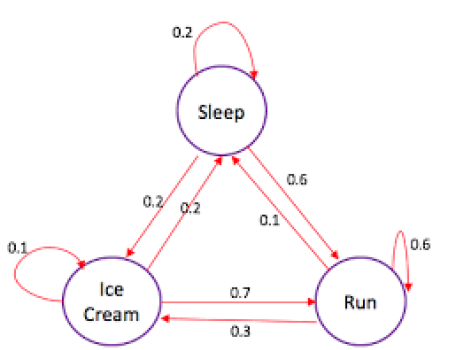

1. **Vector de Estados**, $ s \in \mathbb{R}^S $

2. **Matriz de Transición [de Probabilidad]**, $ \Pi \in \mathbb{R}^{S \times S} $.
   Notar que $\pi_{ss'} \geq 0$, y $\sum_{s'} \in S \pi_{ss'} = 1$, con $ s, s' \in S $

3. Vector [de Probabilidad] de **Estados Iniciales**, $ \pi_0 \in \mathbb{R}^S $

   - **Regla de adaptación** de la Matriz de transición a lo largoo del tiempo: $ \pi_t = \pi_0 \Pi^t $


**¿Cómo construir modelos estocásticos a partir de datos disponibles para el Vector de Estados? ¿Matriz de Transición? ¿y Vector de Estados Iniciales?**

## [Vector de Estados] mediante Representación Simbólica de Datos Temporales

✓ **Cuantización en Bins:** Este procedimiento asigna tuplas a bins  $k$-cuantizados del histograma. Aproximación Delta de 3-bins.

$$
\int_{-\gamma}^{\gamma} \mathcal{N}_x(0, \sigma^2) dx = 2 \int_0^{\gamma} \mathcal{N}_x(0, \sigma^2) dx = 1 - \left( \int_{-\infty}^{-\gamma} + \int_{\gamma}^{\infty} \right) = 1/3,
$$

$$
\int_0^{\gamma} = 1/6 < \frac{\gamma}{\sigma \sqrt{2\pi}};
$$

$$
\gamma \approx 0.42 \sigma : [-\infty, -\gamma] [-\gamma, \gamma], [\gamma, \infty]
$$



✓ **Aproximación Agregada por Segmentos (PAA):** PAA extrae la media/varianza/curtosis sobre puntos consecutivos para agrupar en segmentos de series de tiempo.




In [ ]:
# @title **Integración de Modelos de Markov Con Modelos autoregresivos**

def AR_process(alphas=[0.99],betas=[0]):
    # Simulate an AR(2) process
    alphas = np.array(alphas)
    betas = np.array(betas)
    # Python requires us to specify the zero-lag value which is 1
    # Also note that the alphas for the AR model must be negated
    # We also set the betas for the MA equal to 0 for an AR(p) model
    # For more information see the examples at statsmodels.org
    ar = np.r_[1, -alphas]
    ma = np.r_[1, betas]

    ar2 = statsmodels.tsa.arima_process.arma_generate_sample(ar=ar, ma=ma, nsample=n_samples)
    ar2 = ((ar2 - np.min(ar2))/(np.max(ar2)-np.min(ar2)))
    return ar2

def generate_trajectories(number,alpha=[0.99]):
    trajectories = []
    for i in range(number):
        trajectories.append(AR_process(alphas=alpha))
    return np.array(trajectories)

def generate_RC2_trajectories(number, tau, order=2):
    trajectories = []
    for i in range(number):
        input_signal = np.random.normal(size=n_samples)
        trajectories.append(RC_Filter(n_samples, input_signal, tau, order))
    return np.array(trajectories)

def get_state_maxtrix_clusters(trajectories, n_states=8, type='kmeans'):
    states_matrix = np.zeros(trajectories.shape)
    if type == 'kmeans':
        clust = KMeans(n_clusters=n_states, random_state=0).fit(trajectories.reshape(-1,1))
        #pdb.set_trace()
        sorted_indices = np.argsort(clust.cluster_centers_.flatten())
        clust.cluster_centers_ = clust.cluster_centers_[sorted_indices]
        # pdb.set_trace()
        new_labels = np.zeros_like(clust.labels_)
        for new_label, old_label in enumerate(sorted_indices):
            new_labels[clust.labels_ == old_label] = new_label
        clust.labels_ = new_labels
        clust_means = clust.cluster_centers_
    else:
        clust = GaussianMixture(n_components=n_states, covariance_type='full').fit(trajectories.reshape(-1,1))
        clust_means = clust.means_
    for i in np.arange(trajectories.shape[0]):
      states_matrix[i] = clust.predict(trajectories[i].reshape(-1,1))
      threshodls = np.squeeze(clust_means)
    return states_matrix/n_states, np.sort(threshodls)

def get_state_matrix_bins(trajectories, n_states=8):
  bins = np.linspace(np.min(trajectories),np.max(trajectories),n_states)
  states_matrix = np.digitize(trajectories,bins[1:-1])
  return states_matrix/n_states, bins

def get_probability_transition_matrix(state_matrix):
  states = np.unique(state_matrix)
  probability_transition_matrix = np.zeros((states.shape[0], states.shape[0]))
  for i,s1 in enumerate(states):
    tray, t = np.where(state_matrix[:,:-1]==s1)
    t_1 = t + 1
    for j,s2 in enumerate(states):
      probability_transition_matrix[i,j] = np.round(np.sum(state_matrix[tray,t_1]==s2)/tray.shape[0],2)
  return probability_transition_matrix

def get_initial_state_probabilities(initial_state, states):
  initial_state_probabilities = np.zeros(states.shape[0])
  for i,s1 in enumerate(states):
    initial_state_probabilities[i] = np.round(np.sum(initial_state == s1)/initial_state.shape[0],2)
  return initial_state_probabilities

def generate_sequence_mc(N, A, C, details=False):

    """Generate observation and state sequence from given HMM

    Notebook: C5/C5S3_HiddenMarkovModel.ipynb

    Args:
        N: Number of observations to be generated
        A: State transition probability matrix of dimension I x I
        C: Initial state distribution  of dimension I
        B: Output probability matrix of dimension I x K
        details: If "True" then shows details


    Returns:
        O: Observation sequence of length N
        S: State sequence of length N
    """
    assert N > 0, "N should be at least one"
    I = A.shape[1]
    assert I == A.shape[0], "A should be an I-square matrix"
    assert I == C.shape[0], "Dimension of C should be I"

    S = np.zeros(N, int)
    for n in range(N):
        if n == 0:
            i = np.random.choice(np.arange(I), p=C)
        else:
            p =  p=A[i, :]
            p /= p.sum()
            i = np.random.choice(np.arange(I), p=p)
        S[n] = i
        if details:
            print('n = %d, S[%d] = %d' % (n, n, S[n]))
    return S


np.random.seed(1)

############################ Modeling for n-Order RC Filter
n_samples      = int(512)
fs             = n_samples/4
nlag           = np.ceil(np.log2(n_samples))
States         = [8,16,32]
n_trajectories = 512
alphas = [0.629762, 2.292987,-1.872755, 0.720170,-0.141730]

### Estados calculados por umbralización
##  (Thresholding Markov chain)

state_matrices = []
pt_matrices    = []
trajectories   = generate_trajectories(n_trajectories)  # , alpha=alphas[0]
for index,states_ in enumerate(States):
    state_matrix, bins = get_state_matrix_bins(trajectories, n_states=states_)
    pt_matrix = get_probability_transition_matrix(state_matrix)
    pi_state = get_initial_state_probabilities(state_matrix[:,0], np.unique(state_matrix))
    state_matrices.append(state_matrix[0,:])
    pt_matrices.append(pt_matrix)

tsplot([trajectories[0,:]], ['2RC response'], 'State Model Representation')
tsplot(state_matrices, States, 'States by thresholding')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Creating equally distanced subplots
for i, ax in enumerate(axes):
    cax = ax.imshow(pt_matrices[i])
    ax.set_title(f'{States[i]} states')
    fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)
fig.suptitle('Transition Probability Matrix')
plt.tight_layout()

### Estados calculados por clustering
##  Clustering Markov chain
state_matrices = []
pt_matrices = []
for index,states_ in enumerate(States):
    state_matrix, bins = get_state_maxtrix_clusters(trajectories, n_states=states_)
    pt_matrix = get_probability_transition_matrix(state_matrix)
    pi_state = get_initial_state_probabilities(state_matrix[:,0], np.unique(state_matrix))
    state_matrices.append(state_matrix[0,:])
    pt_matrices.append(pt_matrix)

tsplot(state_matrices, States, 'States by Clustering')
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, ax in enumerate(axes):
    ax.imshow(pt_matrices[i])
    ax.set_title(f'{States[i]} clusters')
fig.suptitle('Transition Probability Matrix')
plt.tight_layout()

### Estados calculados por HMM
##  Hidden Markov  Models
data = trajectories[0,:].reshape(-1, 1)
# Build the HMM model and fit to the  data.
model = hmm.GaussianHMM(n_components=4, covariance_type="diag", n_iter=64, random_state=42)
# n_components=2,4
model.fit(data)

# Predict the hidden states corresponding to observed data.
Z = model.predict(data)
states = pd.unique(Z)

print("Unique  [HMM]:")
print(states)

fig, ax = plt.subplots(figsize=(3, 2))
# Display the matrix using imshow
cax = ax.imshow(model.transmat_, cmap='viridis', aspect='auto')
fig.colorbar(cax, ax=ax)
ax.set_title("Transition matrix", fontsize=6)
ax.set_xlabel('State', fontsize=6); ax.set_ylabel('State', fontsize=6)
fig.tight_layout()

plt.figure(figsize = (18, 6))
plt.subplot(2, 1, 1)
for i in states:
    want = (Z == i)
    x = np.where(want)[0]
    y = data[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=9)
plt.grid(True)
plt.subplot(2, 1, 2)
for i in states:
    want = (Z == i)
    x = np.where(want)[0]
    y = np.diff(data, axis=0, prepend=data[0,0])[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=9)
plt.grid(True)
plt.show()




## **Modelos de Pronóstico Basados en Aprendizaje Automático**

*Análisis de Series Temporales*: Extracción de información estadística y resúmenes significativos de puntos de datos organizados en una secuencia *cronológica* (ordenados en el tiempo), o Series Temporales (ST).

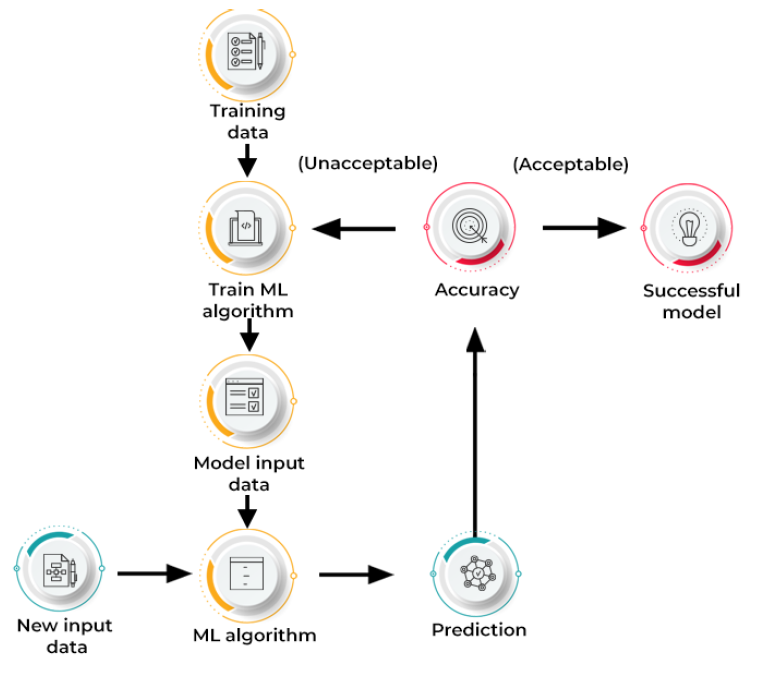

*Marco de Pronóstico:* Esta canalización automatiza los flujos de trabajo de aprendizaje automático para el pronóstico de series temporales mediante el procesamiento e integración de conjuntos de datos en un modelo que será evaluado y entregado, proporcionando flexibilidad, eficiencia y mejor gestión en la implementación del marco.

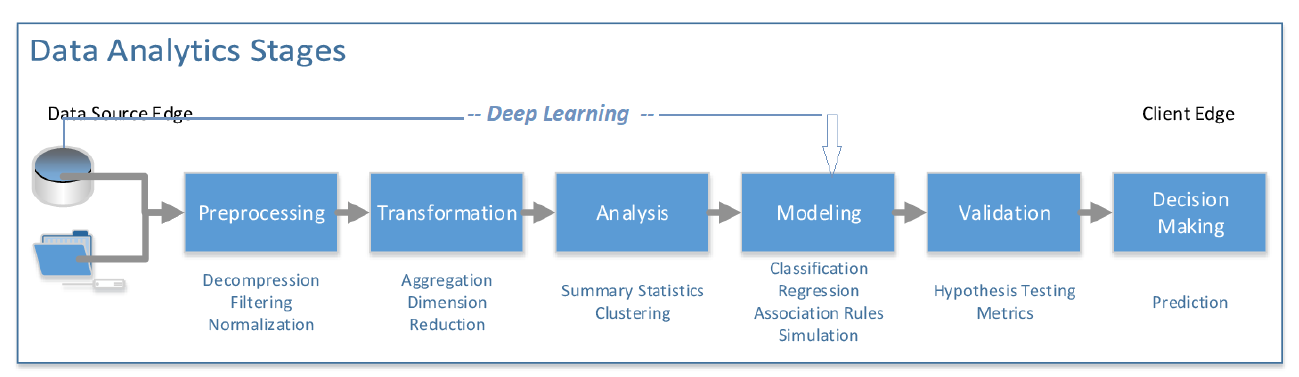

# **Pronóstico Univariado de Series Temporales Estacionales**

## **Recolección y Ensamblaje de Datos**
Adquisición, muestreo/reducción de muestras, almacenamiento y preparación de conjuntos de muestras que contienen información primaria sobre la tarea de inferencia bajo modelado.  

  - Conjunto de datos de energía: Generación de mediciones de energía tomadas por hora desde el 2015-01-01 00:00:00+01:00 hasta 2018.
  - Lectura y conversión de datos y Visualización. Graficar los datos de la serie temporal para observar tendencias, estacionalidad o patrones.



In [ ]:
# Generación de medidas energía  tomadas por hora empezando desde 2015-01-01 00:00:00+01:00 hasta  2018.
df = pd.read_csv("/content/curso_IA_CHEC/Modulo5/databases/energy_dataset.csv")  # energy_dataset.csv
df.head()

In [ ]:
# información de la base de datos
#df.info()
print(df.iloc[0,1:])
#df.columns

In [ ]:
# Convert a series of dates
#  convert the 'time' column of the DataFrame 'df' from object type to datetime type.
df['time'] = pd.to_datetime(df['time'], utc=True)   #convierte el Object time en tipo time

diaSemana = []                                      # array 'diaSemana' contains binary information about whether a day is a Monday (1 if it's Monday, 0 otherwise)
for i in df["time"]:
    diaSemana.append(i.weekday()==0)

np.array(diaSemana, dtype=int)
dia = np.diff(np.array(diaSemana, dtype=int)-0.5)
dia[dia<0]=0
t_zoom  = 1200
dia  = dia[0:t_zoom]
tsplot([dia], ['zoomed data'], title_='Semanas cuando el primer dia es lunes', colors=kolor, flag=0)

In [ ]:
#índices en que los lunes son la primera muestra
primer_lunes = np.argwhere(dia == 1).reshape(-1)
# Drop the column 'time' from the original dataframe df
df = df.drop(columns = ["time"])

## **Preprocesamiento de Datos**  
Los datos inconsistentes se limpian, transforman o codifican para que puedan ser interpretados y alimentados correctamente en la cadena de compilación, manteniendo una carga computacional adecuada.  


In [ ]:
n_rows = 9
n_cols = 3
plt.figure(figsize=(n_cols*5, n_rows*4))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        if index < len(df.columns):  # To avoid index out of range error
            plot_features = df[list(df.columns)[index]]  # Plot all data
            # plot_features = ed[list(ed.columns)[index]][:3000] #dibuja los primeros n datos
            plt.subplot(n_rows, n_cols, index+1)
            plt.plot(plot_features, c=kolor[2])
            plt.title(list(df.columns)[index], fontsize=12, c=kolor[1])
            plt.xlim(0,len(plot_features))
plt.subplots_adjust(wspace=0.24, hspace=0.54)
plt.show()

In [ ]:
# removing empty content time series
energyDataset = df.drop(columns = ["generation fossil coal-derived gas", "generation fossil oil shale", "generation fossil peat", "generation geothermal", "generation hydro pumped storage aggregated", "generation marine", "generation wind offshore", "forecast wind offshore eday ahead"])

In [ ]:
# remaining time series
energyDataset.columns

In [ ]:
# Get the number of columns in the dataset
column_num = len(energyDataset.columns)

n_rows = column_num // n_cols if column_num % n_cols == 0 else column_num // n_cols + 1

plt.figure(figsize=(n_cols*6, n_rows*3))

cnt = 0
for row in range(n_rows):
    for col in range(n_cols):

        if cnt < column_num: # check if the count is less than the column length before plotting
            plot_features = energyDataset[list(energyDataset.columns)[cnt]][:340] #dibuja los primeros n datos
            plt.subplot(n_rows, n_cols, cnt+1)
            plt.plot(plot_features, c=kolor[2])
            plt.xlim(0,len(plot_features))
            plt.title(list(energyDataset.columns)[cnt], fontsize=12, c=kolor[1])

            cnt += 1

plt.subplots_adjust(wspace=0.3, hspace=0.45)
plt.show()

In [ ]:
# preprocessing
# Checking for null values
null_values = energyDataset.isnull().sum()

# Display top 10 columns with most null values
top_n_null_cols = null_values.sort_values(ascending=False).head(10)
print("Top 10 Columns with Most Null Values:")
print(top_n_null_cols)

# Plot the histogram
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.hist(null_values, bins=10, color=kolor[0], edgecolor=kolor[1], alpha=alfas[1])

# Customize labels and title
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title('Histogram of Null Values')
plt.xlabel('Number of Null Values')
plt.ylabel('Frequency')

# Annotate the plot (optional)
plt.text(0.9, 0.8, f"Total Rows: {len(energyDataset)}", ha='right', va='center', size=9)

plt.grid(True)
plt.show()

In [ ]:
# Datos faltantes o no numéricos.
print("Tamaño de datos "+  str(energyDataset.shape)+", que contienen ")
count = np.isinf(energyDataset.values.sum())  #inf values
print("infinite values = " + str(count) )
print("NAN values      = " + str(energyDataset.isna().sum().sum() ) )  # NAN values
count = pd.isnull(energyDataset.values.sum())
print("Null values     =  " + str(count)) # null values

if ( (energyDataset.isna().sum().sum()) > 0 )  or  (pd.isnull(energyDataset.values.sum()) == True) :
  sample_incomplete_rows = energyDataset[energyDataset.isnull().any(axis=1) ]
  print("Length NULL values = " + str(sample_incomplete_rows.shape[0]) )
  sample_isnan_rows = energyDataset[energyDataset.isna().any(axis=1) ].head()
  print("Length NAN values  = " + str(sample_isnan_rows.shape[0]) )
  sample_incomplete_rows.head()
  sample_isnan_rows.head()

In [ ]:
# Missing data
n_rows_to_consider = 135
subset_df = df.iloc[:n_rows_to_consider, :] # df???

# Create a heatmap with the subset dataframe
fig, ax = plt.subplots()
sns.heatmap(subset_df.isnull(), cbar=False)
plt.show()

In [ ]:
data = energyDataset['generation hydro run-of-river and poundage']
NullValues = np.where(data.values == 0)[0]
NaNValues  = np.where(np.isnan(data.values))[0]
print(' NullValues: ',NullValues,'\n', 'NaN Values: ', NaNValues)

In [ ]:
data_interpolated = data.replace(0, np.nan).interpolate()

In [ ]:
# generation hydro run-of-river and poundage

plt.figure()
plt.stem(data,linefmt =kolor[3], markerfmt ='D',
    bottom = 1.1, label='original data')
plt.plot(data_interpolated, c=kolor[2],linewidth=3, label='interpolated data')
# The limit for this plot is dynamic according to NullValues variable
plt.xlim(2*NullValues[0]-NullValues[2],2*NullValues[2]-NullValues[0])
plt.title("Data interpolation")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
NullValues = np.where(data_interpolated == 0)[0]
NaNValues  = np.where(np.isnan(data_interpolated))[0]
print(' NullValues: ',NullValues,'\n', 'NaN Values: ', NaNValues)

### Extracción de componentes

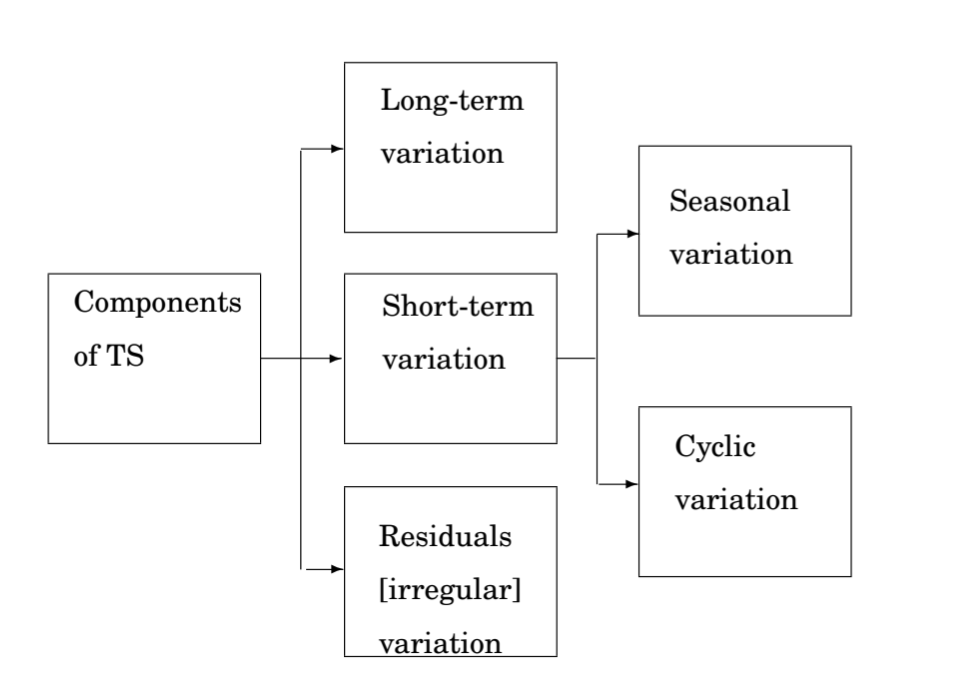


In [ ]:
# Calculate moving average with a window
window = 30
data_avg = np.convolve(data_interpolated, np.ones(window) / window, mode='valid')
# Use the daily change in data as the observed measurements.
            # Calculate data minus moving average
data_dif =data_interpolated[0:len(data_interpolated)-(window-1)] - data_avg
# Instead of modeling the data directly,
# we model the daily change in the data — this allows  to better capture the dynamics state.

labels     = ["Curated data", "avg data", "dif data"]
data_list  = [data_interpolated, data_avg, data_dif]

# * Visualización
title_= 'generation hydro run-of-river and poundage'
tsplot(data_list, labels, title_, colors= kolor,flag=0)
t_zoom  = 1200
data_zoomed  = [data_interpolated[0:t_zoom], data_avg[0:t_zoom], data_dif[0:t_zoom]]
tsplot(data_zoomed, labels, 'zoomed data', colors= kolor,flag=0)

### Matriz de calor (correlación): Estimadores: Pearson, Spearman, Kendall

In [ ]:
# correlation matrix
# Convert lists to pandas DataFrame
df_corr = pd.DataFrame(list(zip(data_interpolated, data_avg, data_dif)),
               columns =['Curated data', 'avg data', 'dif data'])

# Calculate correlation with different methods
pearson_corr  = df_corr.corr(method='pearson')
spearman_corr = df_corr.corr(method='spearman')
kendall_corr  = df_corr.corr(method='kendall')

# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Create heatmaps for Pearson, Spearman, and Kendall correlation
sns.heatmap(pearson_corr, annot=True, fmt=".2f", linewidths=.5, cmap='viridis', ax=axs[0])
axs[0].set_title('Pearson Correlation')

sns.heatmap(spearman_corr, annot=True, fmt=".2f", linewidths=.5, cmap='viridis', ax=axs[1])
axs[1].set_title('Spearman Correlation')

sns.heatmap(kendall_corr, annot=True, fmt=".2f", linewidths=.5, cmap='viridis', ax=axs[2])
axs[2].set_title('Kendall Correlation')

# Create plot
plt.tight_layout()
plt.show()

### Diagramas de dispersión

In [ ]:
# pairwise regression matrix
plt.figure(figsize=(12, 10))
sns.set_theme(font_scale=0.42)
g=sns.pairplot(data=df_corr, size=2.4, diag_kind='kde', corner=True)
g.map_lower(sns.kdeplot, levels=6, color='.1')
plt.show()

### Test estadístico para estacionariedad

- Prueba de Dickey-Fuller Aumentada (ADF) con la hipótesis nula de que la señal no es estacionaria. Si el valor p > 0.05, la serie no es estacionaria y necesita diferenciación para transformarse en una serie estacionaria.

- Prueba de Kwiatkowski-Phillips-Schmidt-Shin (KPSS) con la hipótesis nula de que la señal es estacionaria.

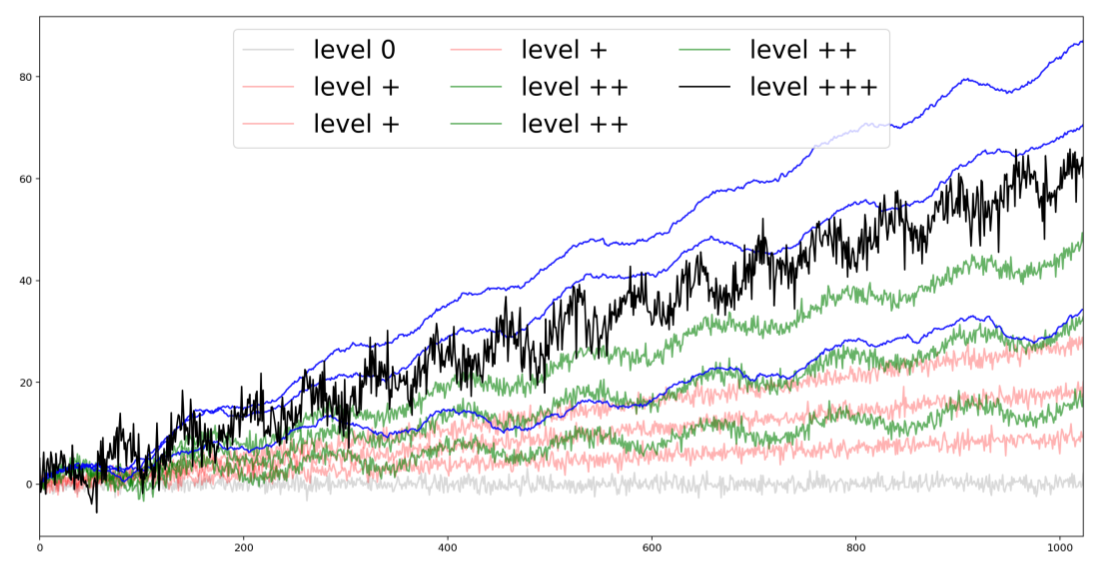

In [ ]:
# @title
fig2, (ax1, ax2) = plt.subplots(2, 1)
index = 0

for data, name in zip(data_list, labels):
    text = colored(name, 'red', attrs=['reverse', 'blink'])
    print(text)
    index += 1
    Stationarity(data)
    Nbins = int(1 + 3.322*np.log2(len(data)))
    ax1.hist(data,bins=Nbins, density=True, alpha=alfas[index], color=kolor[index], edgecolor='k', label=name)
    x_vals = np.linspace(min(data), max(data), Nbins)
    ax1.plot(x_vals, KernelDE(data,Nbins), color=kolor[index],linewidth=3)
    ax1.legend(ncols=len(data_list))
    plt.title("Histogram with KDE")
    ax2.scatter(data[:-1] , data[1:] ,color=kolor[index], alpha=alfas[index], edgecolor='k', label=name)
    ax2.legend(ncols=len(data_list))
plt.tight_layout()
plt.show()

### Secuenciación:  

  Una secuencia de observación $\xi = [\xi_t : t \in T]$ se divide en múltiples segmentos de muestras de duración $L < T$, para el aprendizaje del modelo.

  $\xi \rightarrow \tilde{\eta}$

  % Predicción a un paso
  $\xi_{L+1-n}, \dots, \xi_{2L-n} \rightarrow \eta_{2L+1-n} : \text{predicción a un paso}$

  % Predicción a m pasos
  $\xi_{L+1-n}, \dots, \xi_{2L-n} \rightarrow \eta_{2L+1-n}, \dots, \eta_{2L+1-n+m} : \text{predicción a } m \text{ pasos}$

## **Construcción del modelo y entrenamiento**


Selección o diseño de un algoritmo de aprendizaje automático adecuado para el entrenamiento del modelo, que especifique cómo inferir patrones en los datos.  


## Pronóstico estadístico mediante modelos ARIMA

In [ ]:
# @title
def plot_it(train, forecasts, confidence_intervals):
    train_len = len(train)
    test_len = len(forecasts)
    fig, ax = plt.subplots(figsize=(12,4))
    # Actual vs. Predicted
    ax.plot(train, color=kolor[0], label='Training data', alpha=alfas[0])
    idx_pred = np.arange(train_len, train_len+test_len)
    ax.plot(idx_pred, forecasts, color=kolor[1], marker='o',
                markersize=1, label='Predicted', alpha=alfas[1])
    ax.plot(idx_pred, test[:test_len], color=kolor[2], label='Test data', alpha=alfas[2])
    ax.set_title('Test vs Prediction')
    conf_int = np.asarray(confidence_intervals)

    # Confidence intervals
    ax.fill_between(idx_pred, conf_int[:, 0], conf_int[:, 1],
                        alpha=alfas[1]/2, color=kolor[1],
                        label="Confidence Intervals")
    # Make a plot with major ticks that are multiples of 20
    ax.legend()
    lim_inf = max(min(train) - 2000, min(conf_int[:, 0]) - 500)
    lim_sup = min(max(train) + 2000, max(conf_int[:, 1]) + 500)
    ax.set_ylim(lim_inf, lim_sup)
    ax.set_xlim(0, train_len+test_len)
    plt.show()

In [ ]:
# @title
data = np.array(data_interpolated)[:5000]
train_len = int(data.shape[0] * 0.8)
test_len = data.shape[0] - train_len
train, test = data[:train_len], data[train_len:]

load_models = True

if load_models:
    with open(MODELOS + 'fcast_arima.pkl', 'rb') as f:
        fcast = pickle.load(f)
else:
    model = pm.auto_arima(train,
                        d=None,
                        seasonal=False,
                        stepwise=True,
                        suppress_warnings=True,
                        error_action="ignore",
                        max_p=None,
                        max_order=None,
                        trace=True)
    fcast = model.predict(n_periods=test_len, return_conf_int=True, alpha=0.05)
    with open('fcast_arima.pkl', 'wb') as f:
        pickle.dump(fcast, f)
plot_it(train, *fcast)

In [ ]:
# @title
if load_models:
    with open(MODELOS + 'forecasts_arima.pkl', 'rb') as f:
        forecasts_arima = pickle.load(f)
    with open(MODELOS + 'conf_ints_arima.pkl', 'rb') as f:
        confidence_intervals_arima = pickle.load(f)
else:
    forecasts_arima = []
    confidence_intervals_arima = []

    for add_obs in test:
        fc, conf = one_period_forecast(model, forecasts_arima, confidence_intervals_arima)
        forecasts_arima.append(fc)
        confidence_intervals_arima.append(conf)
        # Updates the existing model
        model.update(add_obs)
    with open('forecasts_arima.pkl', 'wb') as f:
        pickle.dump(forecasts_arima, f)
    with open('conf_ints_arima.pkl', 'wb') as f:
        pickle.dump(confidence_intervals_arima, f)
plot_it(train, forecasts_arima, confidence_intervals_arima)

In [ ]:
# @title
if load_models:
    with open(MODELOS + 'fcast_sarima.pkl', 'rb') as f:
        fcast_sarima = pickle.load(f)
else:
    model_sarima = pm.auto_arima(train,
                        seasonal=True,
                        start_P=1,
                        start_q=1,
                        max_p=None,
                        max_q=None,
                        m=12,
                        d=1,
                        D=1,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True)
    fcast_sarima = model_sarima.predict(n_periods=test_len, return_conf_int=True, alpha=0.05)
    with open('fcast_sarima.pkl', 'wb') as f:
        pickle.dump(fcast_sarima, f)
plot_it(train, *fcast_sarima)

In [ ]:
# @title
if load_models:
    with open(MODELOS + "forecasts_sarima.pkl", "rb") as file:
        forecasts_sarima = pickle.load(file)
    with open(MODELOS + "conf_int_sarima.pkl", "rb") as file:
        confidence_intervals_sarima = pickle.load(file)
else:
    forecasts_sarima = []
    confidence_intervals_sarima = []
    for add_obs in test:
        fc, conf = one_period_forecast(model_sarima, forecasts_sarima, confidence_intervals_sarima)
        forecasts_sarima.append(fc)
        confidence_intervals_sarima.append(conf)
        # Updates the existing model
        model.update(add_obs)
    with open("forecasts_sarima.pkl", "wb") as file:
        pickle.dump(forecasts_sarima, file)
    with open("conf_int_sarima.pkl", "wb") as file:
        pickle.dump(confidence_intervals_sarima, file)
plot_it(train, forecasts_sarima, confidence_intervals_sarima)

## Pronósticos mediante Aprendizaje Automático
![dl](https://github.com/UN-GCPDS/curso_IA_CHEC/blob/main/Modulo5/figuras/dl-scheme.jpg?raw=1)

In [ ]:
# @title
# Set parameters
window_size = 12
test_size = 0.2  # 20% of data for testing
load_models = True  # Flag to load models if they are pre-trained

# Prepare data by interpolating missing values and normalizing
data = data_interpolated  # Assuming `data_interpolated` is a pre-processed time series

# Split data into train and test sets, preserving the temporal order by setting `shuffle=False`
train, test = train_test_split(data, test_size=test_size, shuffle=False)

# Initialize MinMaxScaler for scaling data to a range [0, 1]
scaler = MinMaxScaler()

# Scale the training and testing sets
train_scaled = scaler.fit_transform(np.array(train).reshape(-1, 1)).flatten()
test_scaled = scaler.transform(np.array(test).reshape(-1, 1)).flatten()

# Create windowed training and testing data
X_train, y_train = create_windowed_data(train_scaled, window_size)
X_test, y_test_scaled = create_windowed_data(test_scaled, window_size)

# Inverse transform the scaled test targets back to original values
y_test = scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Ready for training or loading models
if load_models:
    print("Loading pre-trained models...")
else:
    print("Proceeding with training new models...")

### OLS

In [ ]:
# Train Ordinary Least Squares (OLS) linear regression model
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

# Predict on the test set
ols_predictions_scaled = ols_model.predict(X_test)

# Inverse transform the predictions back to the original scale
try:
    ols_predictions = scaler.inverse_transform(ols_predictions_scaled.reshape(-1, 1)).flatten()
except ValueError as e:
    print("Error during inverse transformation:", e)
    ols_predictions = ols_predictions_scaled  # Fallback to scaled predictions if inverse fails

### MLP


![mlp](https://github.com/UN-GCPDS/curso_IA_CHEC/blob/main/Modulo5/figuras/mlp.jpg?raw=1)

In [ ]:
# @title
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.2,  # Reduce LR by 20%
    patience=5,  # Wait 5 epochs before reducing LR
    min_lr=1e-6
)

early_stop = EarlyStopping(monitor='val_loss', patience=10)

callbacks = [reduce_lr, early_stop]

In [ ]:
# @title
load_models = True
model_path = MODELOS + 'mlp_model.keras'
if load_models:
    mlp_model = load_model(model_path)
else:
    # Define MLP model
    mlp_model = Sequential([
        Input(shape=(window_size,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer with one unit for regression
    ])

    mlp_model.compile(optimizer='adam', loss='mse')

    # Train MLP model
    history = mlp_model.fit(X_train, y_train, epochs=50, batch_size=256, callbacks=callbacks,
                            validation_data=(X_test, y_test_scaled), verbose=1)

    mlp_model.save(model_path)    # save the model after training.
mlp_predictions = mlp_model.predict(X_test)
mlp_predictions = scaler.inverse_transform(mlp_predictions)

## Red Neuronal con Adaptación Dinámica

**Capas de Recurrencia**: Dos elementos vecinos (RNN) y LSTM (Memoria a Largo Plazo) para capturar dependencias a largo plazo, incorporando conexiones de retroalimentación.

![lstm](https://github.com/UN-GCPDS/curso_IA_CHEC/blob/main/Modulo5/figuras/lstm.jpg?raw=1)

In [ ]:
# @title
# Reshape data for LSTM input (samples, timesteps, features)
X_train_lstm = X_train.reshape(-1, 12, 1)
X_test_lstm = X_test.reshape(-1, 12, 1)

model_path = MODELOS + 'lstm_model.keras'
if load_models:
    lstm_model = load_model(model_path)
else:
    # Define LSTM model
    lstm_model = Sequential([
        Input(shape=(window_size, 1)),
        LSTM(50, activation='relu'),
        Dense(1)
    ])
    lstm_model.compile(optimizer='adam', loss='mse')
    # early stopping not working properly
    lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=1, callbacks=callbacks[:1],
                   validation_data=(X_test_lstm, y_test_scaled))
    lstm_model.save(model_path)
# Predict and inverse scale
lstm_predictions = lstm_model.predict(X_test_lstm)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

In [ ]:
# @title
# Ensure all data to be plotted are 1-dimensional by reshaping using numpy's ravel function
plot_len = 200
data_to_plot = [np.ravel(y) for y in [y_test[:plot_len], ols_predictions[:plot_len], mlp_predictions[:plot_len], lstm_predictions[:plot_len]]]

tsplot(data_to_plot, ['True Values', 'OLS', 'MLP', 'LSTM'], title_='True data and Model Predictions')

**Capas Convolucionales**: Un conjunto de filtros (o kernels) para reconocer patrones presentes en series temporales.

![cnn](https://github.com/UN-GCPDS/curso_IA_CHEC/blob/main/Modulo5/figuras/cnn.jpg?raw=1)

In [ ]:
# @title
model_path = MODELOS + 'lstm_cnn_model.keras'
if load_models:
    lstm_cnn_model = load_model(model_path)
else:
    # Define LSTM + CNN model
    lstm_cnn_model = Sequential([
        Input(shape=(window_size, 1)),
        LSTM(50, activation='relu', return_sequences=True),
        Conv1D(filters=32, kernel_size=5, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(1)
    ])
    lstm_cnn_model.compile(optimizer='adam', loss='mse')
    lstm_cnn_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=1, callbacks=callbacks[:1],
                       validation_data=(X_test_lstm, y_test_scaled))
    lstm_cnn_model.save(model_path)
# Predict and inverse scale
lstm_cnn_predictions = lstm_cnn_model.predict(X_test_lstm)
lstm_cnn_predictions = scaler.inverse_transform(lstm_cnn_predictions)

In [ ]:
# @title
model_path = MODELOS + 'cnn_lstm_model.keras'
if load_models:
    cnn_lstm_model = load_model(model_path)
else:
    # Define CNN + LSTM model
    cnn_lstm_model = Sequential([
        Input(shape=(window_size, 1)),
        Conv1D(filters=32, kernel_size=5, activation='relu'),
        #MaxPooling1D(pool_size=2),
        LSTM(50, activation='relu'),
        Flatten(),
        Dense(1)
    ])
    cnn_lstm_model.compile(optimizer='adam', loss='mse')
    cnn_lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=1, callbacks=callbacks[:1],
                       validation_data=(X_test_lstm, y_test_scaled))
    cnn_lstm_model.save(model_path)
# Predict and inverse scale
cnn_lstm_predictions = cnn_lstm_model.predict(X_test_lstm)
cnn_lstm_predictions = scaler.inverse_transform(cnn_lstm_predictions)

In [ ]:
# @title
# slice the data to have equal lengths
y_test_sliced = y_test[:plot_len]
lstm_predictions_sliced = lstm_predictions[:plot_len]
lstm_cnn_predictions_sliced = lstm_cnn_predictions[:plot_len]
cnn_lstm_predictions_sliced = cnn_lstm_predictions[:plot_len]

data_to_plot = [
    np.ravel(y) for y in [y_test_sliced, lstm_predictions_sliced, lstm_cnn_predictions_sliced, cnn_lstm_predictions_sliced]
]

if len(np.unique([len(data) for data in data_to_plot])) == 1:  # check if all data series have same length
    tsplot(data_to_plot, ['True Values', 'LSTM', 'LSTM+CNN', 'CNN+LSTM'], title_='True data and Model Predictions')
else:
    print('The lengths of data series are not equal. Please check the lengths')

In [ ]:
# @title
models_results = [ols_predictions, mlp_predictions, lstm_predictions, lstm_cnn_predictions, cnn_lstm_predictions]
models_names = ['OLS', 'MLP', 'LSTM', 'LSTM+CNN', 'CNN+LSTM']
mse_values = [mean_squared_error(y_test, pred) for pred in models_results]
mae_values = [mean_absolute_error(y_test, pred) for pred in models_results]
results = pd.DataFrame({'Model': models_names, 'MSE': mse_values, 'MAE': mae_values}).set_index('Model')
results

### Adaptación Dinámica mediante Transformers

Mecanismos dinámicos incluidos en redes neuronales secuenciales:

- **Capas de Recurrencia**:
- **Capas Convolucionales**:
- **Arquitectura codificador/decodificador**: Dado que las entradas y salidas tienen longitudes variables y no están alineadas.
- **Mecanismo de Atención**: Una evolución del modelo Codificador-Decodificador, desarrollado para evitar olvidar partes anteriores de la secuencia.

  La computación de atención requiere representar las unidades básicas del dominio de entrada con un trío de vectores (tensores): Consulta (Query), Clave (Key) y Valor (Value), que son transformaciones de los vectores de estado de entrada correspondientes.  

  **Ejemplo de Tarea**: Al buscar videos en YouTube, el motor de búsqueda mapea la consulta (el texto en la barra de búsqueda) contra un conjunto de claves (títulos de videos, descripciones, etc.) asociadas con los videos candidatos en su base de datos, y luego presenta los videos mejor coincidentes (valores).

- **Matriz de Transición y Capas de Atención**: Ambos involucran el concepto de sumas ponderadas para capturar dependencias entre elementos que permiten a las redes neuronales enfocarse en partes relevantes de la secuencia de entrada.

  Ambos mecanismos incluyen:
  
  - **Suma Ponderada**: Ambos calculan sumas ponderadas de valores, donde los pesos representan la importancia de cada valor.
  - **Adaptación Dinámica**: Mientras que las matrices de transición son estáticas, las capas de atención pueden adaptar dinámicamente los pesos según la secuencia de entrada.

**Cómo las Capas de Atención pueden verse como Matrices de Transición Dinámicas**:

- El vector de consulta puede considerarse el estado actual del modelo.
- Los vectores clave representan posibles estados futuros.
- Los pesos de atención determinan la probabilidad de transición a cada estado futuro.

El mecanismo de Atención asigna una importancia ponderada a diferentes pasos de tiempo de los datos de entrada, permitiendo que el modelo priorice la información más relevante y mejore su rendimiento predictivo.


In [ ]:
# @title
# Hyperparameters
input_dim = 1  # Since each time step has a single feature
hidden_dim = 50
epochs = 100
load_models = True
# LSTM with Attention Mechanism
class LSTMAttention(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1, num_layers=1):
        super(LSTMAttention, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.attention = nn.Linear(hidden_dim, 1)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        attention_weights = torch.softmax(self.attention(lstm_out).squeeze(-1), dim=-1)
        context_vector = torch.sum(lstm_out * attention_weights.unsqueeze(-1), dim=1)
        out = self.fc(context_vector)
        return out, attention_weights

# Initialize model and scaler
model = LSTMAttention(input_dim=input_dim, hidden_dim=hidden_dim)
scaler = MinMaxScaler()
data_interpolated_scaled = scaler.fit_transform(data_interpolated.values.reshape(-1, 1))
# Create sequences with the given window size
X, y = [], []
for i in range(len(data_interpolated_scaled) - window_size):
    X.append(data_interpolated_scaled[i:i+window_size])
    y.append(data_interpolated_scaled[i+window_size])
X = np.array(X)
y = np.array(y)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)
if load_models:
    # Load model and scaler
    model.load_state_dict(torch.load(MODELOS + 'lstm_attention_model.pth'))
    model.eval()  # Set to evaluation mode

else:

    # Define training parameters
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5, verbose=True)

    # Training loop
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        output, _ = model(X_train_tensor)
        loss = criterion(output, y_train_tensor)
        loss.backward()
        optimizer.step()

        # Evaluation
        model.eval()
        with torch.no_grad():
            test_pred, _ = model(X_test_tensor)
            test_loss = criterion(test_pred, y_test_tensor)
            scheduler.step(test_loss)

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}, Test Loss: {test_loss.item()}')

    # Save model and scaler after training
    torch.save(model.state_dict(), 'lstm_attention_model.pth')

# Predictions
model.eval()
with torch.no_grad():
    predictions, attention_weights = model(X_test_tensor)
    predictions = predictions.detach().numpy()
    predictions_actual = scaler.inverse_transform(predictions)


In [ ]:
# @title
# slice the data to have equal lengths
plot_len = 100
y_test_sliced = scaler.inverse_transform(y_test).reshape(-1, 1)[:plot_len]
transformer_predictions_sliced = predictions_actual[:plot_len]

data_to_plot = [
    np.ravel(y) for y in [y_test_sliced, transformer_predictions_sliced]
]

if len(np.unique([len(data) for data in data_to_plot])) == 1:  # check if all data series have same length
    tsplot(data_to_plot, ['True Values', 'Transformer'], title_='True data and Model Predictions')
else:
    print('The lengths of data series are not equal. Please check the lengths')

In [ ]:
# @title
plt.figure(figsize=(6, 6))
plt.imshow(attention_weights.numpy()[0:20,:], cmap='hot', interpolation='nearest')
plt.title('Attention Weights')
plt.colorbar()
plt.show()

## Ensamble de Redes Neuronales:
![ensamble](https://github.com/UN-GCPDS/curso_IA_CHEC/blob/main/Modulo5/figuras/schemes.png?raw=1)


## **Evaluación del modelo**

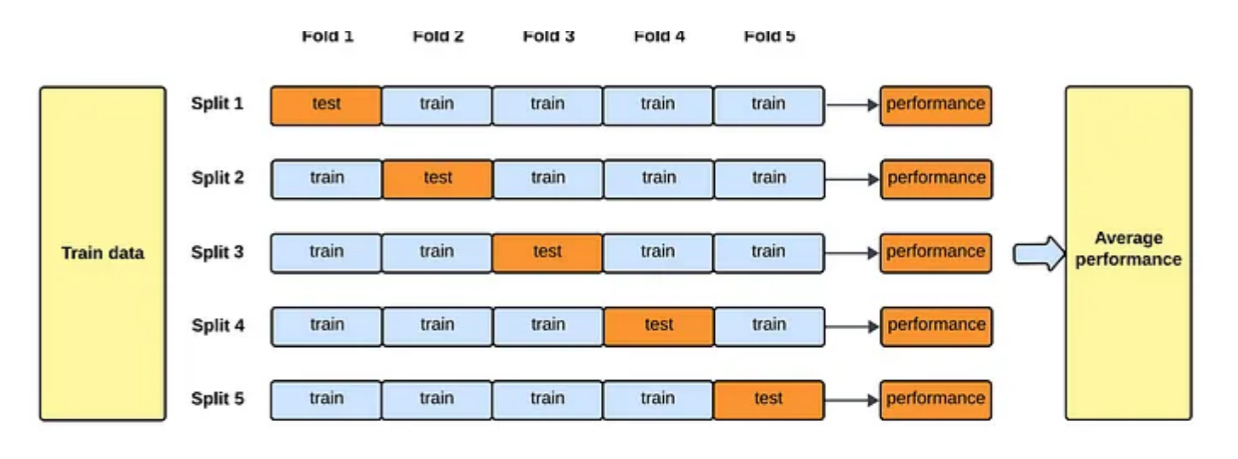

In [ ]:
# @title Ventana deslizante

# Parámetros de la ventana deslizante
train_size = 3000  # Tamaño de la ventana de entrenamiento
test_size = 1000   # Tamaño de la ventana de prueba
step_size = 500    # Paso de la ventana deslizante

# Configuración de la figura
fig, ax = plt.subplots(figsize=(10, 2))
ax.plot(data_interpolated, label="Data", c = 'gray')  # Graficar la serie de tiempo completa
ax.set_xlim(0, len(data_interpolated))
ax.set_ylim(np.min(data_interpolated), np.max(data_interpolated))
ax.set_xlabel("Time", fontsize=10)  # Reducir tamaño de la fuente en el eje X
ax.set_ylabel("Value", fontsize=10)  # Reducir tamaño de la fuente en el eje Y
ax.set_title("Sliding Window", fontsize=12)  # Reducir tamaño de la fuente del título

# Ajustar el tamaño de los números de los ejes
ax.tick_params(axis='both', which='major', labelsize=8)  # Reducir tamaño de los números en los ejes

# Crear rectángulos para las ventanas de entrenamiento y prueba
train_rect = Rectangle((0, np.min(data_interpolated)), train_size, np.ptp(data_interpolated),
                       edgecolor='blue', facecolor='blue', alpha=0.3, label='Train')
test_rect = Rectangle((train_size, np.min(data_interpolated)), test_size, np.ptp(data_interpolated),
                      edgecolor='red', facecolor='red', alpha=0.3, label='Test')
ax.add_patch(train_rect)
ax.add_patch(test_rect)
ax.legend()

# Función de actualización para la animación
def update(frame):
    # Calcular las posiciones de las ventanas de entrenamiento y prueba
    train_start = frame * step_size
    test_start = train_start + train_size

    # Actualizar la posición de los rectángulos
    train_rect.set_x(train_start)
    test_rect.set_x(test_start)

    return train_rect, test_rect

# Crear la animación
frames = (len(data_interpolated) - train_size - test_size) // step_size
ani = FuncAnimation(fig, update, frames=frames, blit=False, interval=200)

# Mostrar la animación en Google Colab
plt.close(fig)  # Evitar que se duplique la salida
HTML(ani.to_jshtml())

In [ ]:
# @title Ventana expandible

# Parámetros de la ventana expansiva
train_size_initial = 1500  # Tamaño inicial de la ventana de entrenamiento
test_size = 1500          # Tamaño de la ventana de prueba
max_train_size = len(data_interpolated) - test_size    # Tamaño máximo de la ventana de entrenamiento
step_size = 1000           # Paso de la expansión de la ventana

# Configuración de la figura
fig, ax = plt.subplots(figsize=(10, 2))
ax.plot(data_interpolated, label="Data", c = 'gray')  # Graficar la serie de tiempo completa
ax.set_xlim(0, len(data_interpolated))
ax.set_ylim(np.min(data_interpolated), np.max(data_interpolated))
ax.set_xlabel("Time", fontsize=10)  # Reducir tamaño de la fuente en el eje X
ax.set_ylabel("Value", fontsize=10)  # Reducir tamaño de la fuente en el eje Y
ax.set_title("Expanding Window Animation", fontsize=12)  # Reducir tamaño de la fuente del título

# Ajustar el tamaño de los números de los ejes
ax.tick_params(axis='both', which='major', labelsize=8)  # Reducir tamaño de los números en los ejes

# Crear rectángulos para las ventanas de entrenamiento y prueba
train_rect = Rectangle((0, np.min(data_interpolated)), train_size_initial, np.ptp(data_interpolated),
                       edgecolor='blue', facecolor='blue', alpha=0.3, label='Train')
test_rect = Rectangle((train_size_initial, np.min(data_interpolated)), test_size, np.ptp(data_interpolated),
                      edgecolor='red', facecolor='red', alpha=0.3, label='Test')
ax.add_patch(train_rect)
ax.add_patch(test_rect)
ax.legend()

# Función de actualización para la animación
def update(frame):
    # Expansión de la ventana de entrenamiento
    train_size = min(train_size_initial + frame * step_size, max_train_size)

    # Mantener la ventana de prueba fija en la posición final
    test_start = train_size  # La ventana de prueba empieza donde termina la ventana de entrenamiento

    # Actualizar la posición y tamaño de los rectángulos
    train_rect.set_width(train_size)  # Expandir la ventana de entrenamiento
    test_rect.set_x(test_start)  # La ventana de prueba no cambia de tamaño, solo se ajusta la posición

    return train_rect, test_rect

# Crear la animación
frames = (max_train_size - train_size_initial) // step_size  # Total de frames para expandir la ventana
ani = FuncAnimation(fig, update, frames=frames, blit=False, interval=200)

# Mostrar la animación en Google Colab
plt.close(fig)  # Evitar que se duplique la salida
HTML(ani.to_jshtml())

In [ ]:
# @title Ventana aleatoria

# Parámetros para el shuffle
train_size = 4000  # Tamaño de la ventana de entrenamiento
test_size = 1000   # Tamaño de la ventana de prueba
max_size = len(data_interpolated)  # Tamaño máximo del conjunto de datos
step_size = 10000      # Paso en cada frame (solo afecta al número de frames)

# Suponiendo que data_interpolated está definido (puedes simularlo así)
# data_interpolated = np.sin(np.linspace(0, 100, 10000))  # Ejemplo de datos de serie de tiempo

# Configuración de la figura
fig, ax = plt.subplots(figsize=(10, 2))
ax.plot(data_interpolated, label="Data", c = 'gray')  # Graficar la serie de tiempo completa
ax.set_xlim(0, len(data_interpolated))
ax.set_ylim(np.min(data_interpolated), np.max(data_interpolated))
ax.set_xlabel("Time", fontsize=10)  # Reducir tamaño de la fuente en el eje X
ax.set_ylabel("Value", fontsize=10)  # Reducir tamaño de la fuente en el eje Y
ax.set_title("Shuffle Window Animation", fontsize=12)  # Reducir tamaño de la fuente del título

# Ajustar el tamaño de los números de los ejes
ax.tick_params(axis='both', which='major', labelsize=8)  # Reducir tamaño de los números en los ejes

# Crear rectángulos para las ventanas de entrenamiento y prueba
train_rect = Rectangle((0, np.min(data_interpolated)), train_size, np.ptp(data_interpolated),
                       edgecolor='blue', facecolor='blue', alpha=0.3, label='Train')
test_rect = Rectangle((train_size, np.min(data_interpolated)), test_size, np.ptp(data_interpolated),
                      edgecolor='red', facecolor='red', alpha=0.3, label='Test')
ax.add_patch(train_rect)
ax.add_patch(test_rect)
ax.legend()

# Función de actualización para la animación
def update(frame):
    # Seleccionar índices aleatorios para las ventanas de entrenamiento y prueba
    start_train = np.random.randint(0, max_size - train_size - test_size)  # Entrenamiento en un rango válido
    start_test = np.random.randint(start_train + train_size, max_size - test_size)  # Test después de la ventana de entrenamiento

    # Actualizar las posiciones de los rectángulos
    train_rect.set_x(start_train)
    train_rect.set_width(train_size)

    test_rect.set_x(start_test)
    test_rect.set_width(test_size)

    return train_rect, test_rect

# Crear la animación
frames = 30  # Número de frames, puedes ajustarlo para más o menos variabilidad
ani = FuncAnimation(fig, update, frames=frames, blit=False, interval=500)

# Mostrar la animación en Google Colab
plt.close(fig)  # Evitar que se duplique la salida
HTML(ani.to_jshtml())


## **Ejemplo en base de datos de energía**

In [ ]:
# @title Modelos ARMA, ARIMA(0) y ARIMA(1)

# pick best order by aic
# the smallest aic value is the best
for d in (0,1,2):
    p = []
    q = []
    if d == 0:
        title_ = f'ARMA model d(0).'
        i = 4
        j = 9
    elif d == 1:
        title_ = f'ARIMA model d(1).'
        i = 4
        j = 9
    else:
        title_ = f'ARIMA model d({d}).'
        i = 8
        j = 9

    output_signal = data_interpolated[:10000]
    best_aic   = np.inf
    best_order = None
    best_mdl   = None
    best_results = None

    tmp_mdl = ARIMA(output_signal, order=(i, d, j), trend='n', enforce_stationarity=False, enforce_invertibility=False).fit(method='innovations_mle')
    tmp_aic = tmp_mdl.aic
    if tmp_aic < best_aic:
        best_aic = tmp_aic
        best_order = (i, j)
        best_mdl = tmp_mdl

    output_arma = best_mdl.predict()
    _ = tsplot([output_signal, output_arma], ['Original', 'Reconstruction'], title_=title_, flag=3)
    # métricas
    mae = mean_absolute_error(output_signal, output_arma)
    mse = mean_squared_error(output_signal, output_arma)
    mape = np.mean(np.abs((output_signal - output_arma) / output_signal)) * 100
    r2 = r2_score(output_signal, output_arma)
    # Imprimir los resultados
    print("Results of", title_)
    print(f'Total - aic: {best_aic:6.5f} | order: {best_order}')
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"MAPE: {mape}%")
    print(f"R²: {r2}")
    print("")


In [ ]:
# @title Modelo SARIMA

for k in range(4):
    output_signal = data_interpolated[k*len(data_interpolated)//4:(k+1)*len(data_interpolated)//4]

# Definición de parámetros del modelo
order = (4, 0, 9)            # Parámetros no estacionales
seasonal_order = (1, 1, 0, 7) # Parámetros estacionales

# Ajuste del modelo SARIMAX
model = SARIMAX(
    output_signal,
    order=order,
    seasonal_order=seasonal_order,
    # exog=exogenous_vars,       # Cambia esto si tienes variables exógenas
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarimax_result = model.fit()

predictions = sarimax_result.predict(
    start=0,                      # Iniciar en el primer índice
    end=len(output_signal) - 1)    # Finalizar en el último índice

_ = tsplot([output_signal, predictions], ['Original', 'Reconstruction'], title_ = 'SARIMA', flag = 3)